##Import Library

In [ ]:
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [ ]:
from matplotlib import pyplot as plt
from google.colab import drive
import numpy as np
import os
import time
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from scipy.signal import butter, filtfilt, stft

## Read Data

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = '/content/gdrive/MyDrive/ASB/dataset'
data_fatigue = '/content/gdrive/MyDrive/ASB/dataset/fatigue'
data_nonfatigue ='/content/gdrive/MyDrive/ASB/dataset/non fatigue'

print('Total fatigue data:', len(os.listdir(data_fatigue)))
print('Total non fatigue data:', len(os.listdir(data_nonfatigue)))

Total fatigue data: 26
Total non fatigue data: 26


In [ ]:
# Cetak daftar file di dalam folder data_fatigue
print("Daftar file di dalam folder fatigue:")
for file_name in os.listdir(data_fatigue):
    print(file_name)

# Cetak daftar file di dalam folder data_nonfatigue
print("\nDaftar file di dalam folder non fatigue:")
for file_name in os.listdir(data_nonfatigue):
    print(file_name)


Daftar file di dalam folder fatigue:
nazhir_F.csv
aida_F.csv
aldhito_F.csv
azka_F.csv
caca_F.csv
Christi_F.csv
Faris_F.csv
Hasna_F.csv
insan_F.csv
Khayla_F.csv
nae_F.csv
Nazla_F.csv
Niken_F.csv
niko_F.csv
putri_F.csv
raffa_F.csv
Rona_F.csv
Shalsa_F.csv
tyo_F.csv
umar_F.csv
ipul_F.csv
jeki_F.csv
sipa_F.csv
tarisa_F.csv
giselle_F.csv
iqbal_F.csv

Daftar file di dalam folder non fatigue:
aida_NF.csv
aldhito_NF.csv
azka_NF.csv
caca_NF.csv
Christi_NF.csv
giselle_NF.csv
Faris_NF.csv
Hasna_NF.csv
insan_NF.csv
Khayla_NF.csv
Nae_NF.csv
nazhir_NF.csv
Nazla_NF.csv
niken_NF.csv
niko_NF.csv
putri_NF.csv
raffa_NF.csv
Rona_NF.csv
Shalsa_NF.csv
tyo_NF.csv
umar_NF.csv
iqbal_NF.csv
ipul_NF.csv
jeki_NF.csv
syifa_NF.csv
tarisa_NF.csv


## Function

In [ ]:
# Fungsi untuk membuat nol baseline
def zero_baseline_correction(data):
    baseline = np.mean(data)
    corrected_data = data - baseline
    return corrected_data

# Fungsi untuk mengabsolutkan sinyal
def absolute_signal(data):
    absolute_data = np.abs(data)
    return absolute_data

# Fungsi untuk memuat dan memfilter data
def load_and_filter_data(file_path, ranges_to_keep):
    data = pd.read_csv(file_path)['amplitudo'].values
    # Melakukan koreksi nol baseline
    data = zero_baseline_correction(data)
    # Mengabsolutkan sinyal
    data = absolute_signal(data)
    filtered_data = np.concatenate([data[start:end] for start, end in ranges_to_keep])
    return filtered_data

# Fungsi untuk normalisasi data
def normalisasi(data):
    nmin = min(data)
    nmax = max(data)
    normal = [(x - nmin) / (nmax - nmin) for x in data]
    return normal

# Fungsi untuk filter Butterworth
def butterworth_filter(data, lowcut, highcut, fs, order=4, btype='band'):
    nyquist_freq = 0.5 * fs
    low = lowcut / nyquist_freq
    high = highcut / nyquist_freq
    b, a = butter(order, [low, high], btype=btype, analog=False)
    y = filtfilt(b, a, data)
    return y

# Fungsi untuk plotting STFT tanpa keterangan
def save_stft(data, fs, filename):
    f, t, Zxx = stft(data, fs=fs, nperseg=1000)
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
    plt.axis('off')  # Menghilangkan semua sumbu dan label
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    #plt.close()  # Menutup plot untuk menghindari tampilan langsung
    plt.show()
# Parameter untuk filter Butterworth
lowcut = 10  # frekuensi cut-off rendah dalam Hz
highcut = 100  # frekuensi cut-off tinggi dalam Hz
fs = 1000  # frekuensi sampel dalam Hz'''

# Data Preprocessing Signal

### Non Fatigue

In [ ]:
# Daftar nama file non fatigue
file_names_non_fatigue = [
    'aida_NF.csv',
    'aldhito_NF.csv',
    'azka_NF.csv',
    'caca_NF.csv',
    'Christi_NF.csv',
    'giselle_NF.csv',
    'Faris_NF.csv',
    'Hasna_NF.csv',
    'insan_NF.csv',
    'Khayla_NF.csv',
    'Nae_NF.csv',
    'nazhir_NF.csv',
    'Nazla_NF.csv',
    'niken_NF.csv',
    'niko_NF.csv',
    'putri_NF.csv',
    'raffa_NF.csv',
    'Rona_NF.csv',
    'Shalsa_NF.csv',
    'tyo_NF.csv',
    'umar_NF.csv',
    'iqbal_NF.csv',
    'ipul_NF.csv',
    'jeki_NF.csv',
    'syifa_NF.csv',
    'tarisa_NF.csv'
]

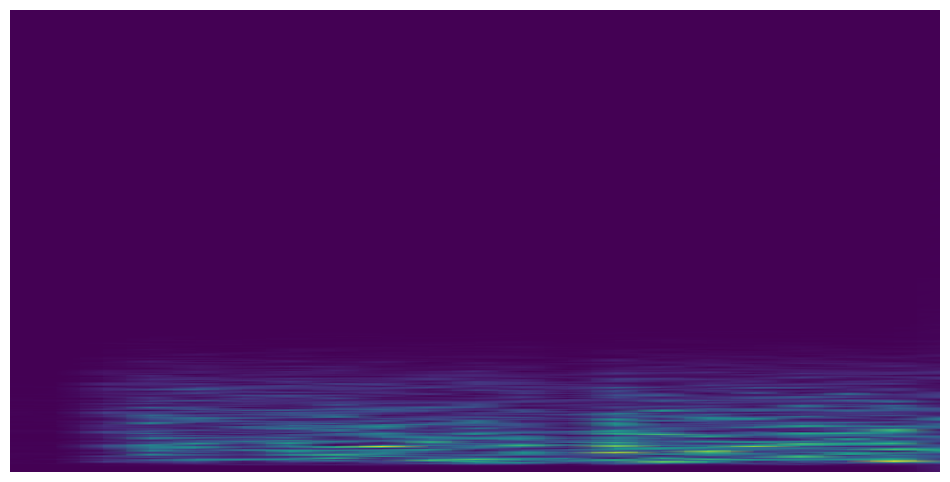

   Processed Signal
0          0.000274
1         -0.000116
2         -0.000487
3         -0.000806
4         -0.001021


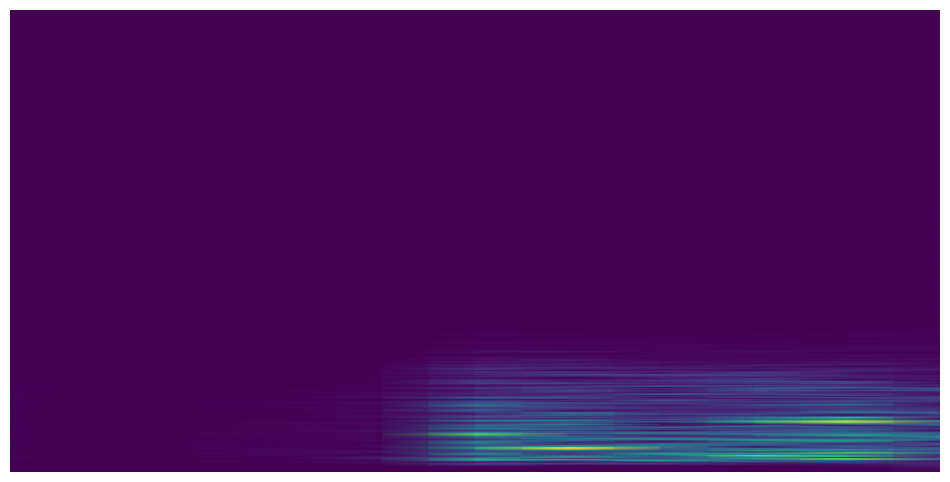

   Processed Signal
0         -0.000023
1         -0.003915
2         -0.006978
3         -0.008418
4         -0.007574


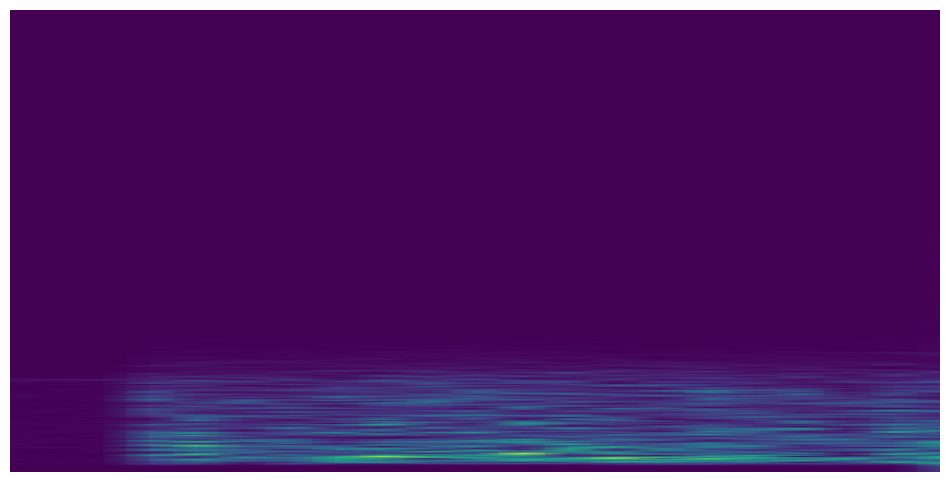

   Processed Signal
0          0.000404
1         -0.004482
2         -0.008903
3         -0.012388
4         -0.014494


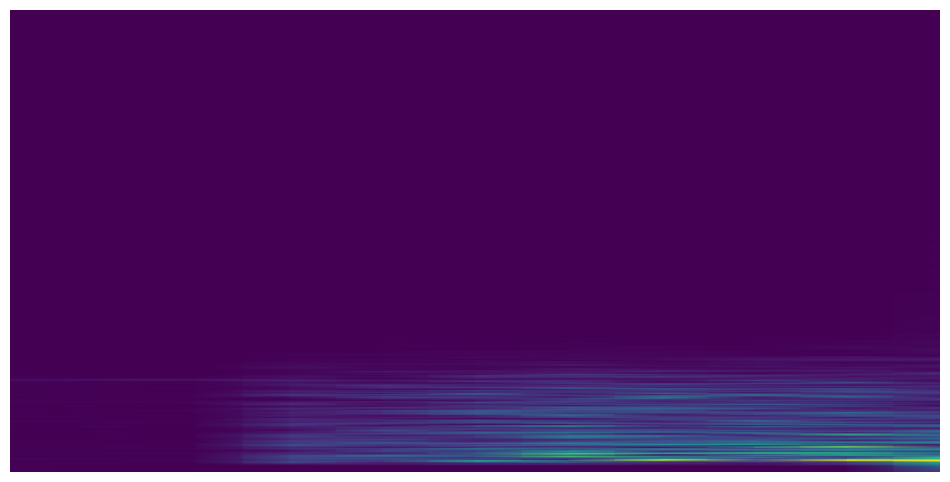

   Processed Signal
0          0.000067
1         -0.002671
2         -0.005366
3         -0.007847
4         -0.009773


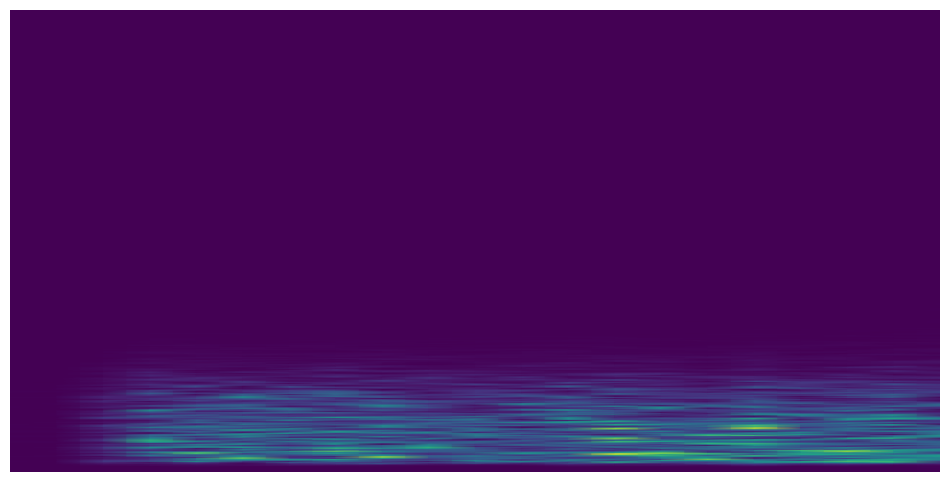

   Processed Signal
0         -0.000048
1         -0.000032
2         -0.000094
3         -0.000291
4         -0.000637


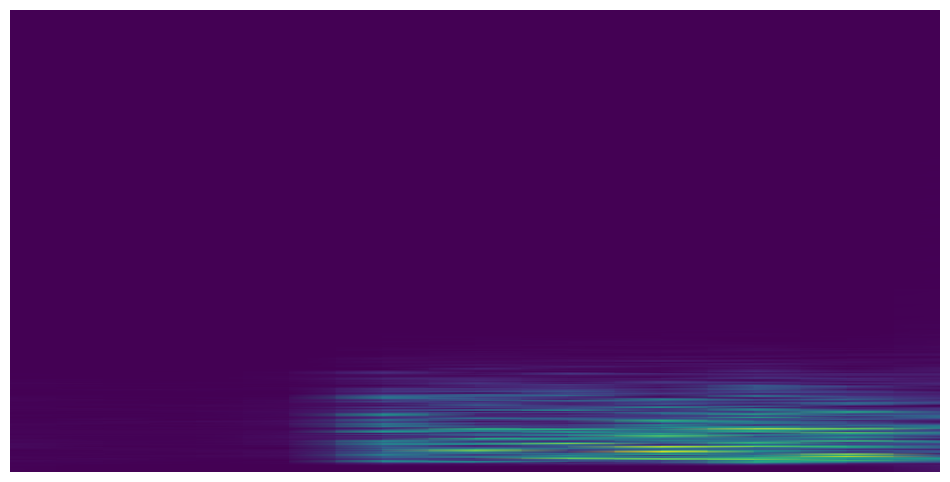

   Processed Signal
0         -0.000837
1          0.000195
2          0.001332
3          0.002662
4          0.004218


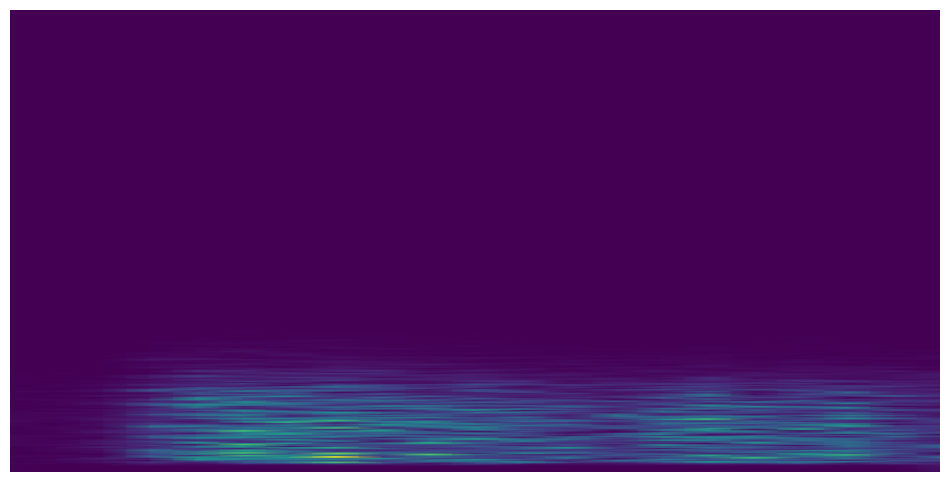

   Processed Signal
0         -0.000280
1          0.004981
2          0.009024
3          0.010996
4          0.010640


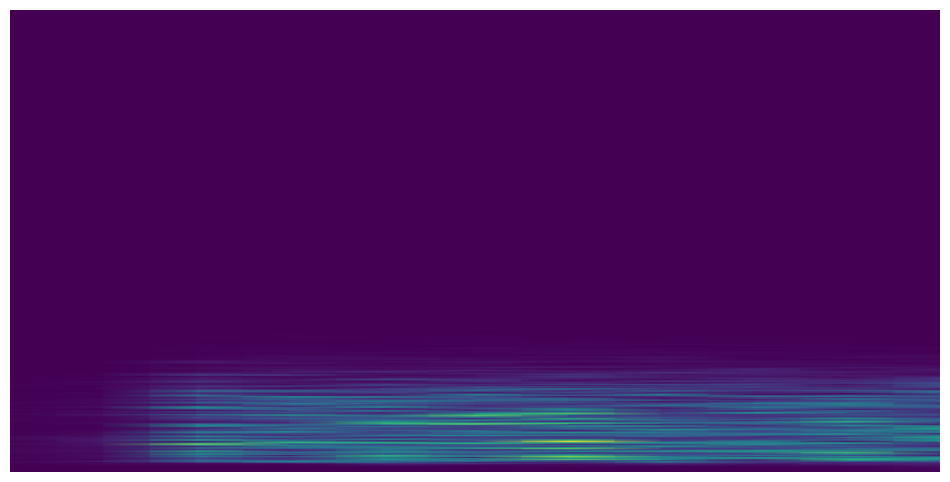

   Processed Signal
0          0.000036
1          0.001198
2          0.002413
3          0.003646
4          0.004739


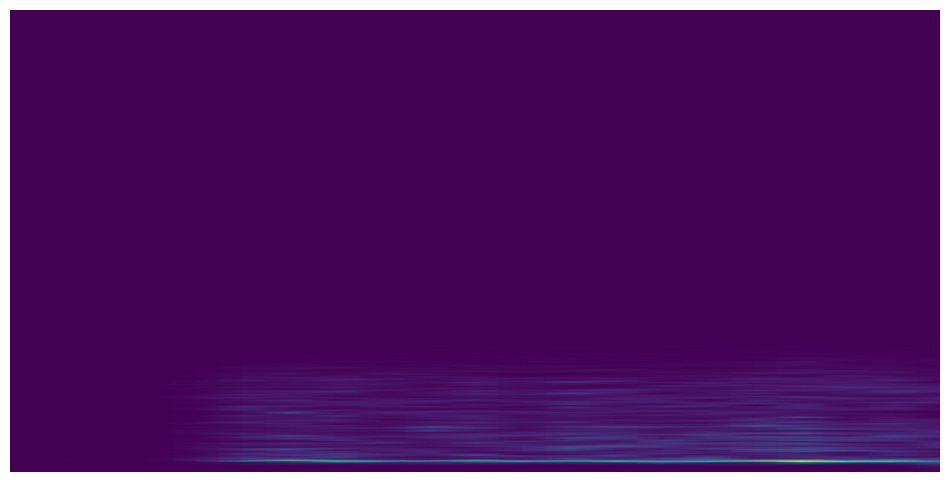

   Processed Signal
0         -0.000029
1          0.000505
2          0.000973
3          0.001328
4          0.001567


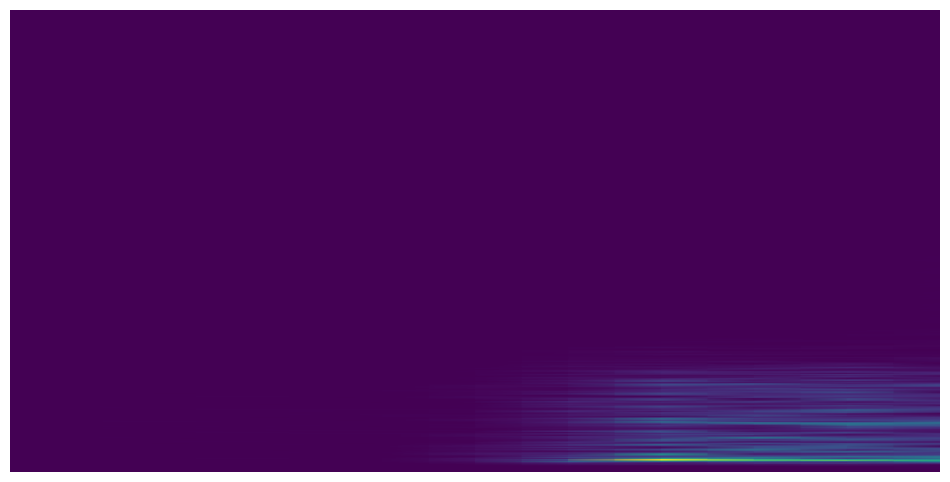

   Processed Signal
0          0.000013
1          0.000645
2          0.001132
3          0.001383
4          0.001401


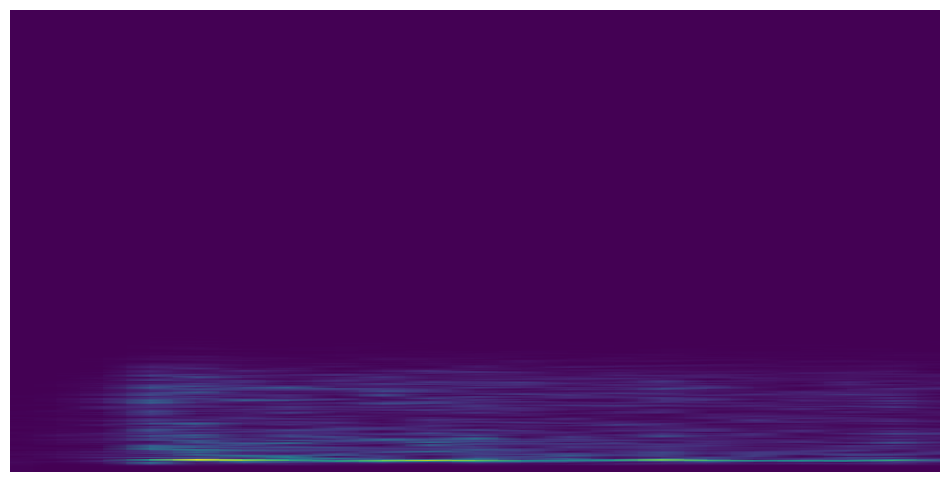

   Processed Signal
0          0.000103
1         -0.007606
2         -0.014311
3         -0.019254
4         -0.022092


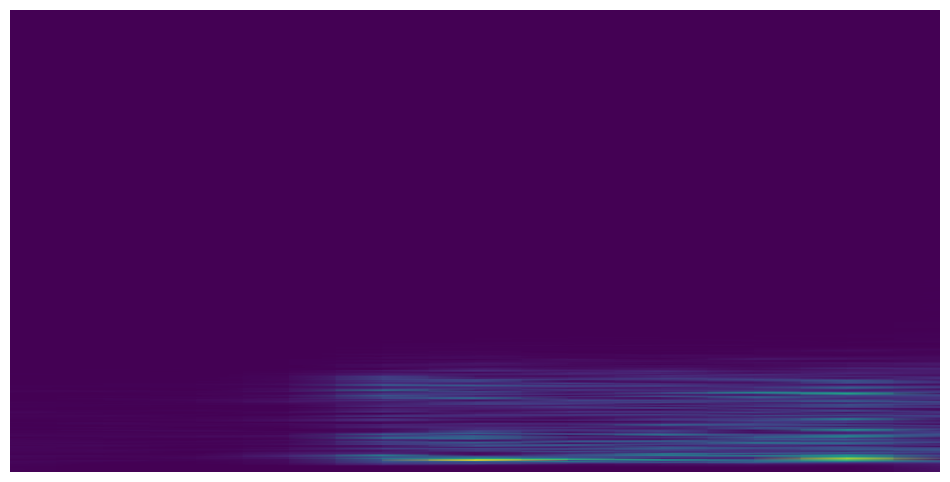

   Processed Signal
0         -0.000116
1         -0.005786
2         -0.010941
3         -0.015111
4         -0.017937


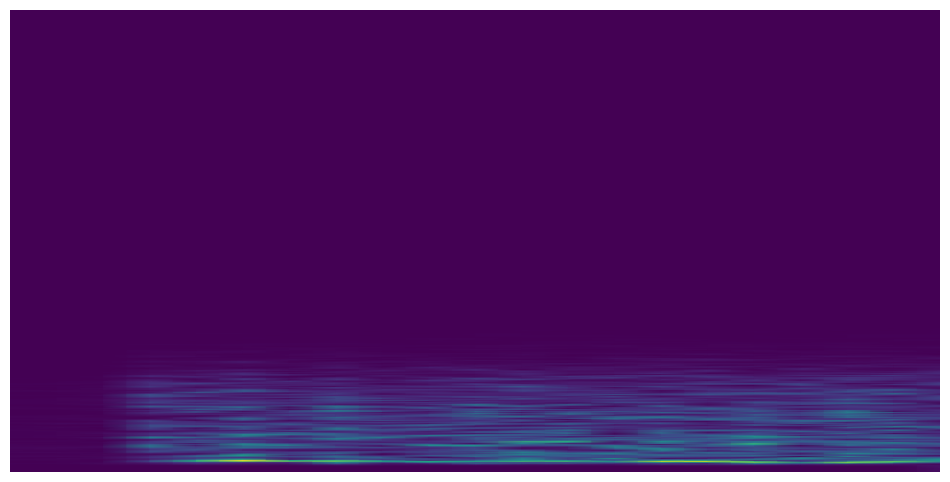

   Processed Signal
0         -0.000089
1         -0.001903
2         -0.003468
3         -0.004600
4         -0.005217


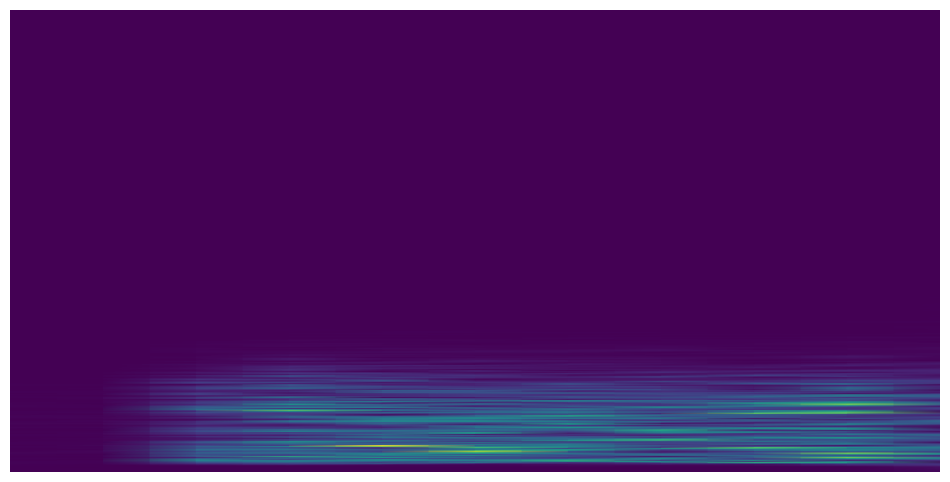

   Processed Signal
0          0.000117
1          0.002951
2          0.005157
3          0.006200
4          0.005746


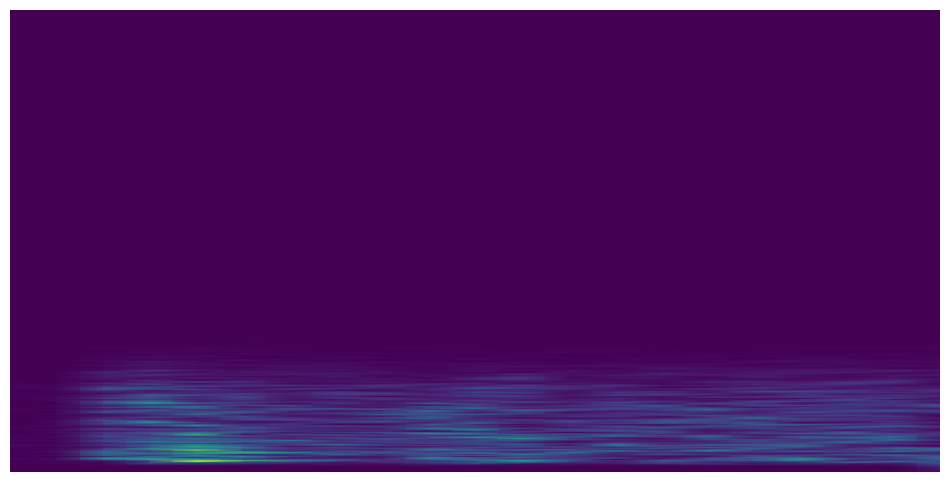

   Processed Signal
0         -0.000710
1          0.003078
2          0.005989
3          0.007506
4          0.007645


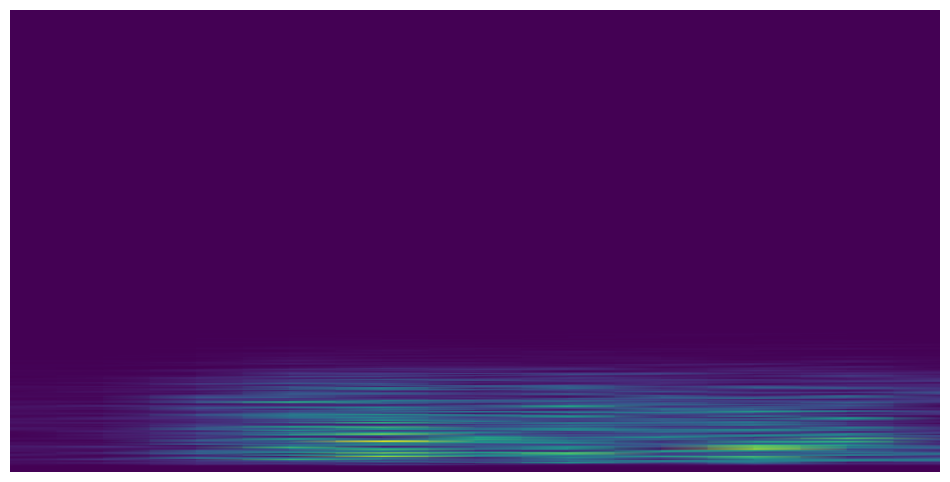

   Processed Signal
0         -0.000216
1         -0.000517
2         -0.000772
3         -0.000889
4         -0.000730


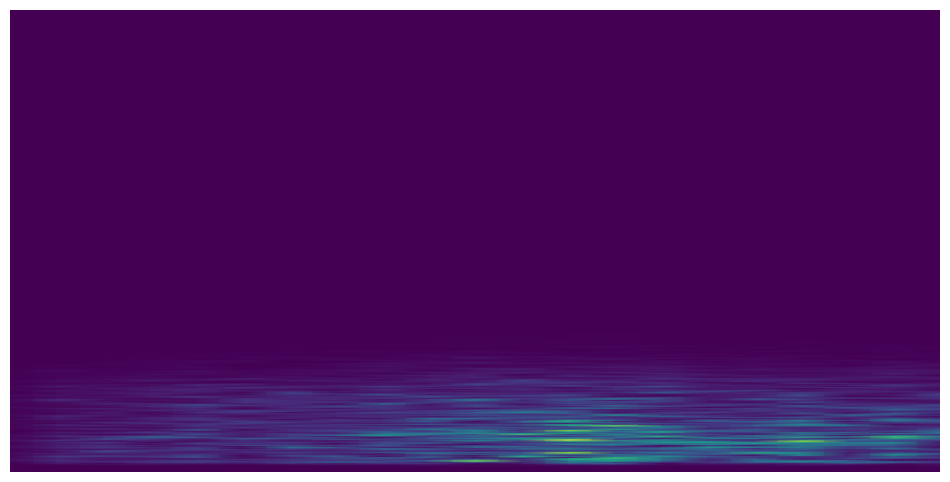

   Processed Signal
0          0.000082
1          0.000955
2          0.001979
3          0.003233
4          0.004674


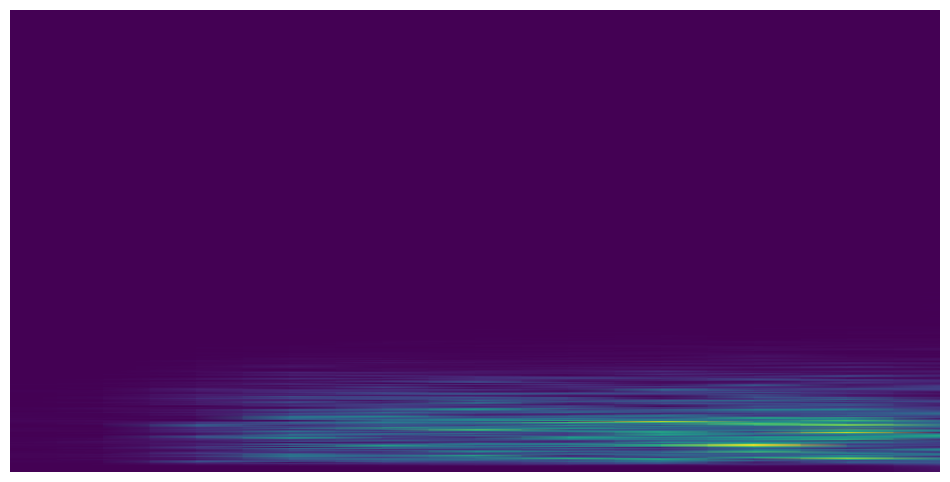

   Processed Signal
0          0.000345
1          0.001064
2          0.001691
3          0.002165
4          0.002466


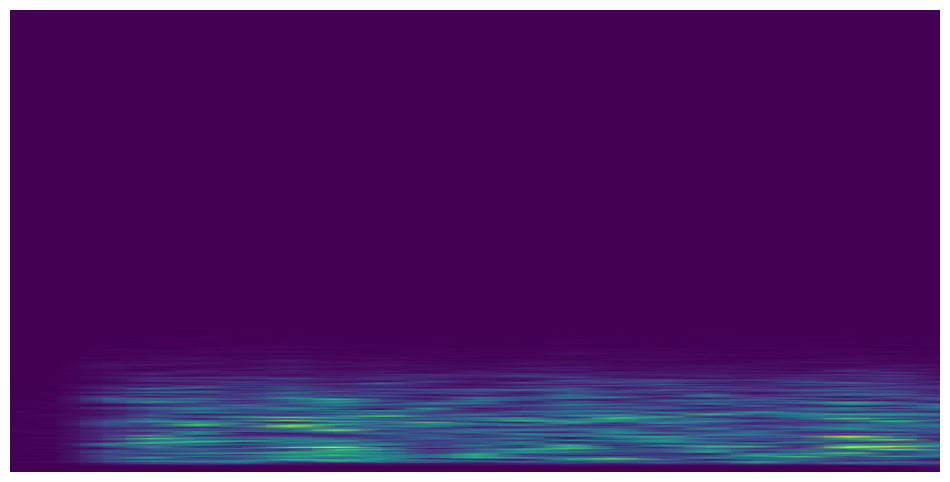

   Processed Signal
0         -0.000058
1          0.001633
2          0.002979
3          0.003753
4          0.003909


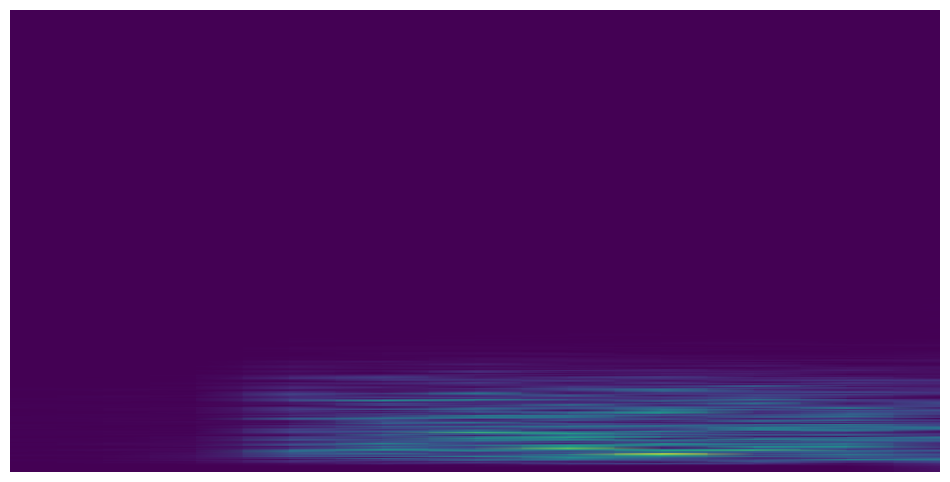

   Processed Signal
0         -0.000286
1         -0.000188
2          0.000359
3          0.001570
4          0.003302


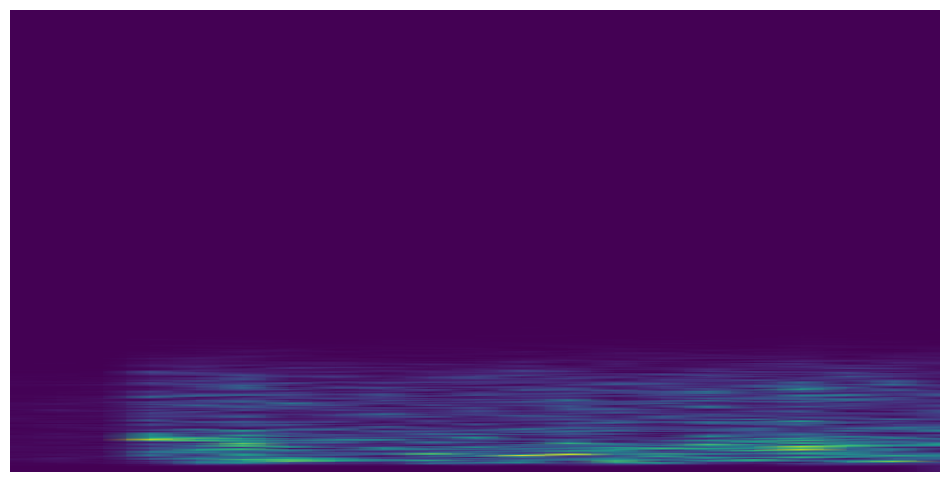

   Processed Signal
0         -0.000341
1          0.002293
2          0.004411
3          0.005673
4          0.005991


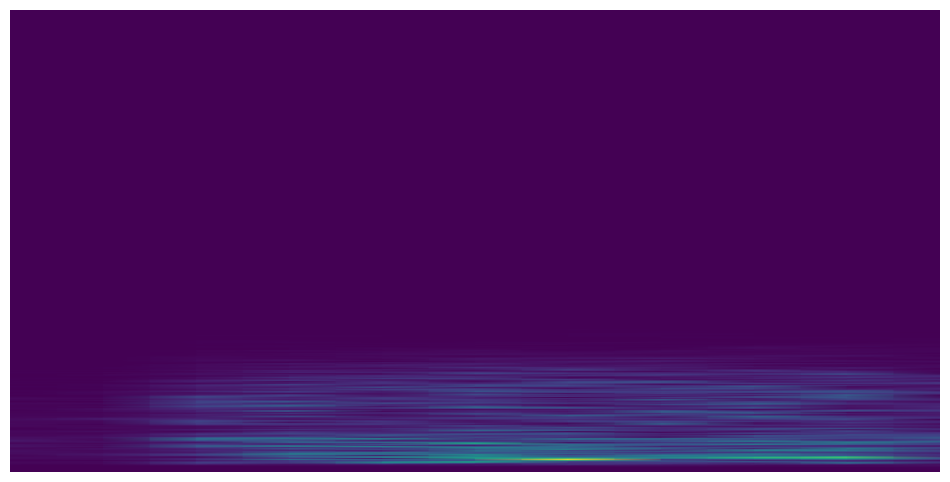

   Processed Signal
0          0.000284
1         -0.002679
2         -0.005392
3         -0.007638
4         -0.009263


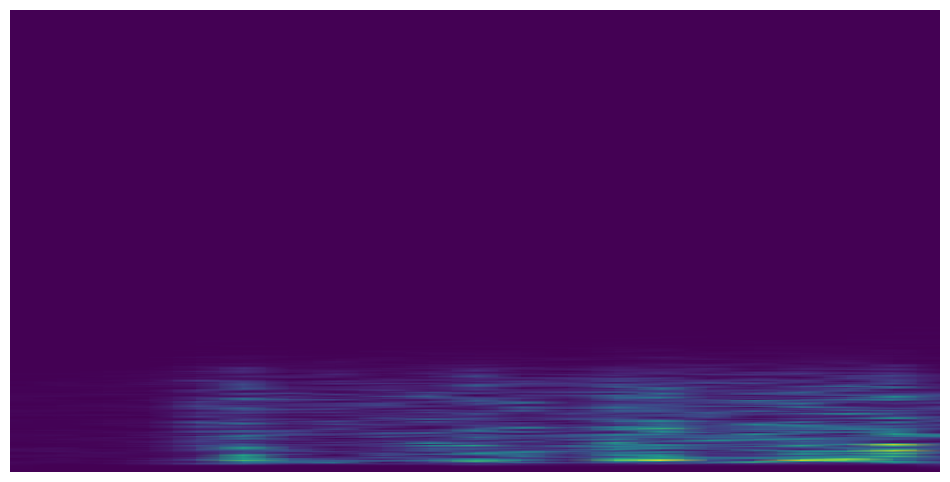

   Processed Signal
0         -0.000105
1          0.001589
2          0.002953
3          0.003791
4          0.004107


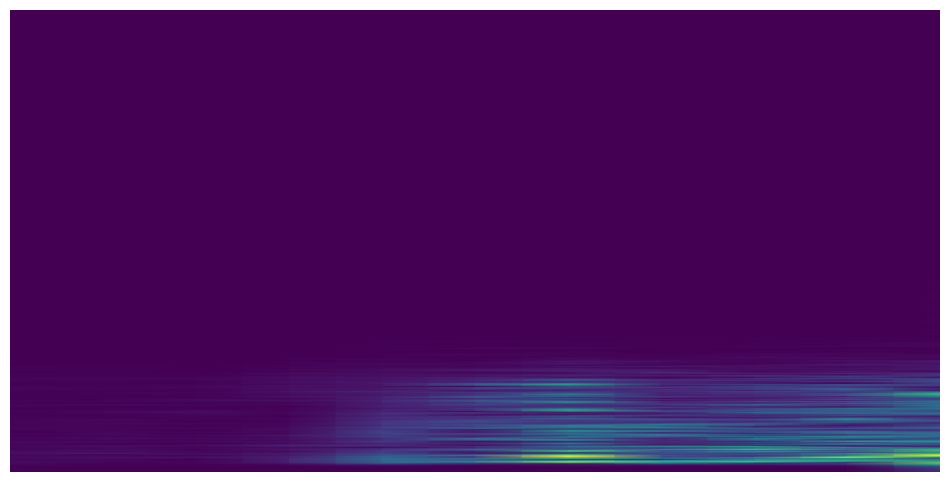

   Processed Signal
0         -0.001967
1          0.001242
2          0.003651
3          0.004767
4          0.004588


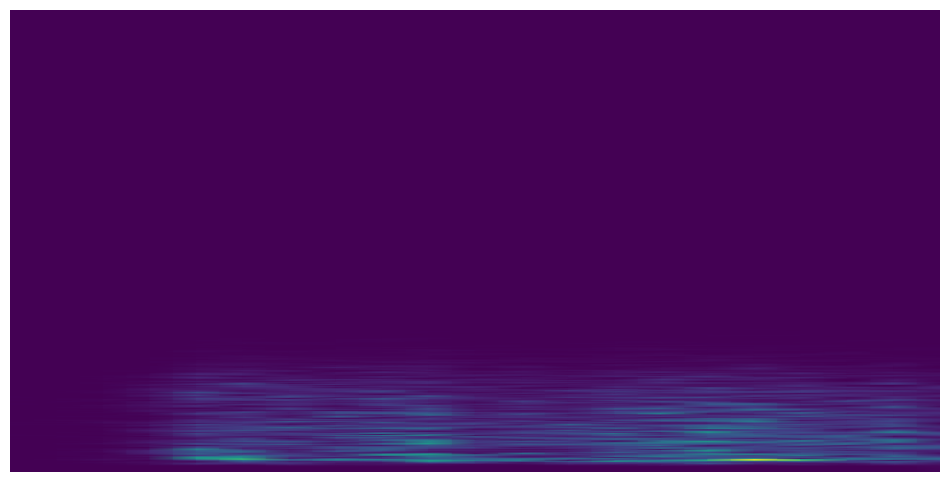

   Processed Signal
0         -0.000149
1         -0.000684
2         -0.001054
3         -0.001137
4         -0.000884


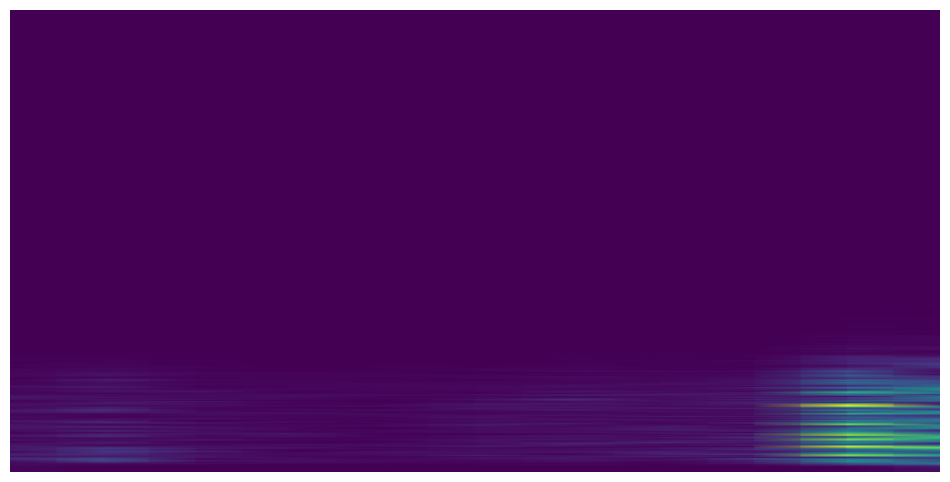

   Processed Signal
0          0.000506
1         -0.002281
2         -0.004722
3         -0.006559
4         -0.007684


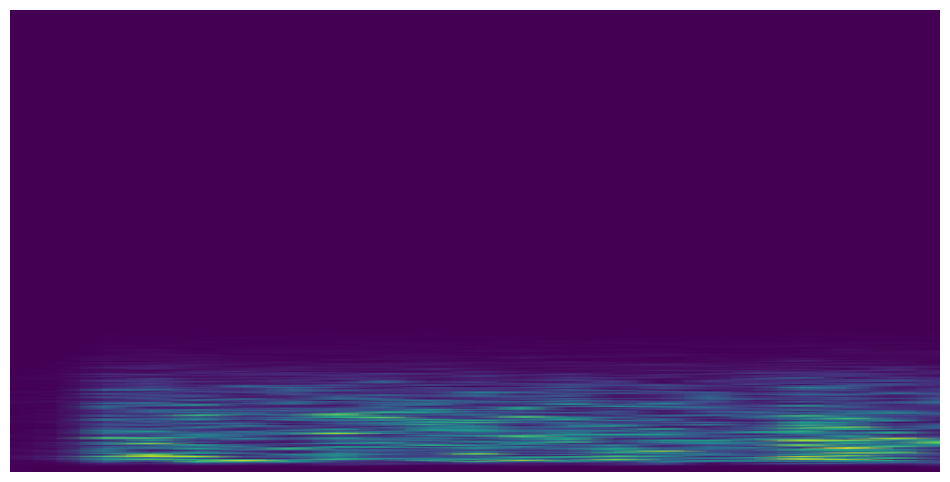

   Processed Signal
0          0.000216
1         -0.000878
2         -0.001575
3         -0.001606
4         -0.000915


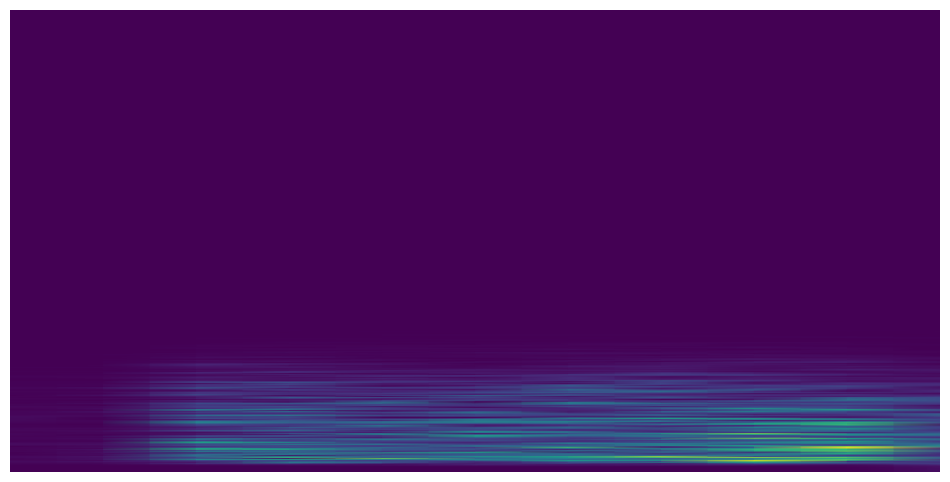

   Processed Signal
0         -0.000178
1         -0.000100
2         -0.000128
3         -0.000316
4         -0.000617


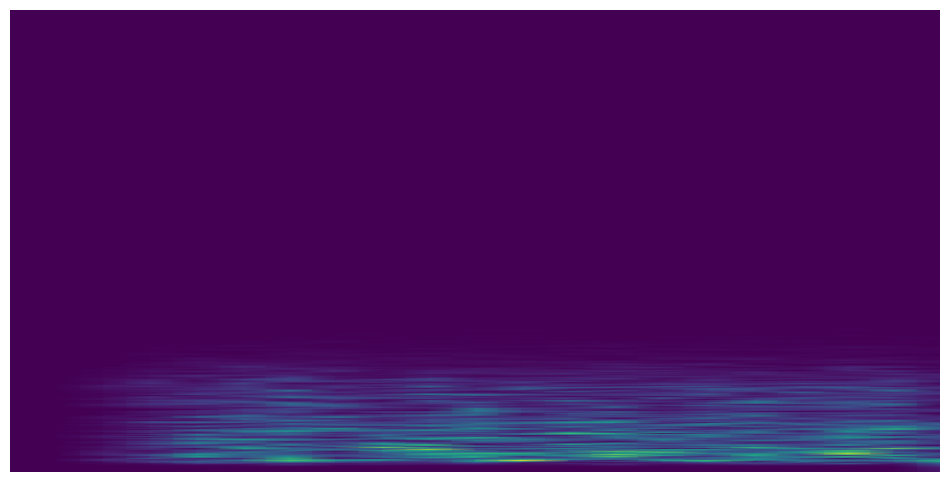

   Processed Signal
0         -0.000095
1          0.000211
2          0.000456
3          0.000598
4          0.000622


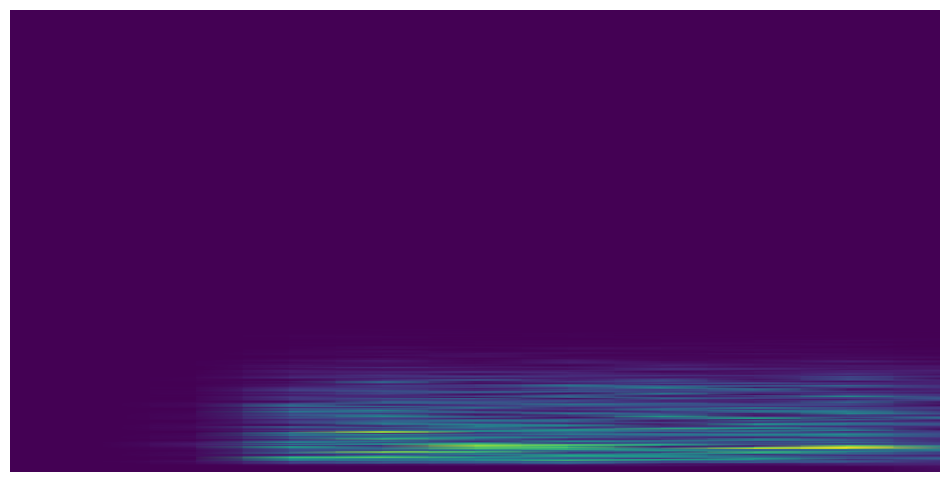

   Processed Signal
0          0.000078
1         -0.000015
2         -0.000046
3          0.000033
4          0.000252


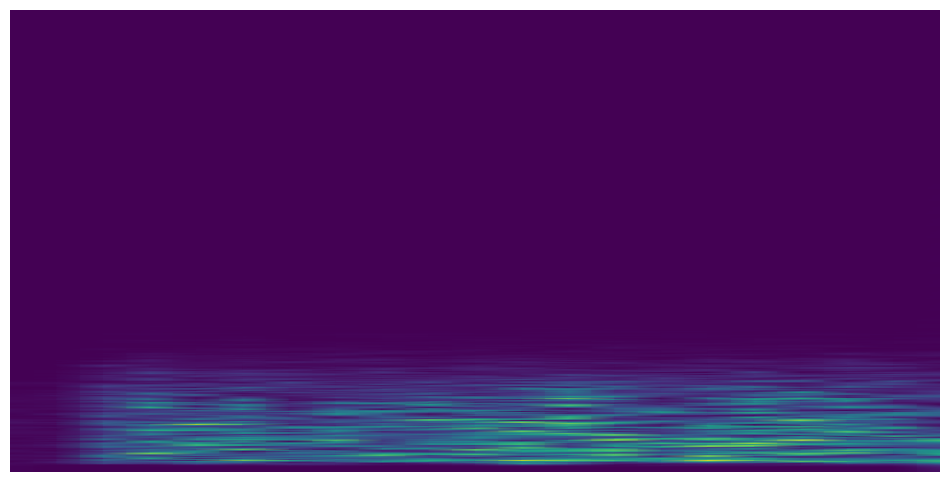

   Processed Signal
0          0.000533
1         -0.002237
2         -0.004655
3         -0.006493
4         -0.007710


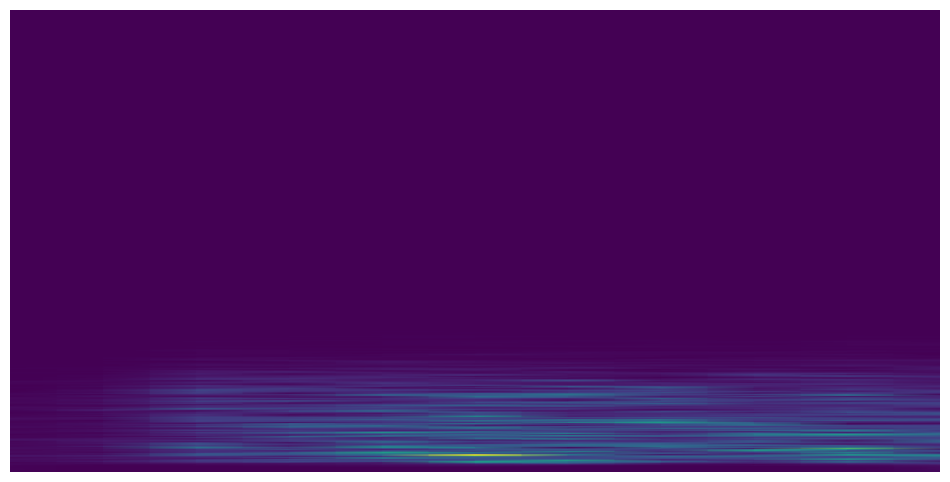

   Processed Signal
0          0.000902
1         -0.001902
2         -0.003599
3         -0.003308
4         -0.000564


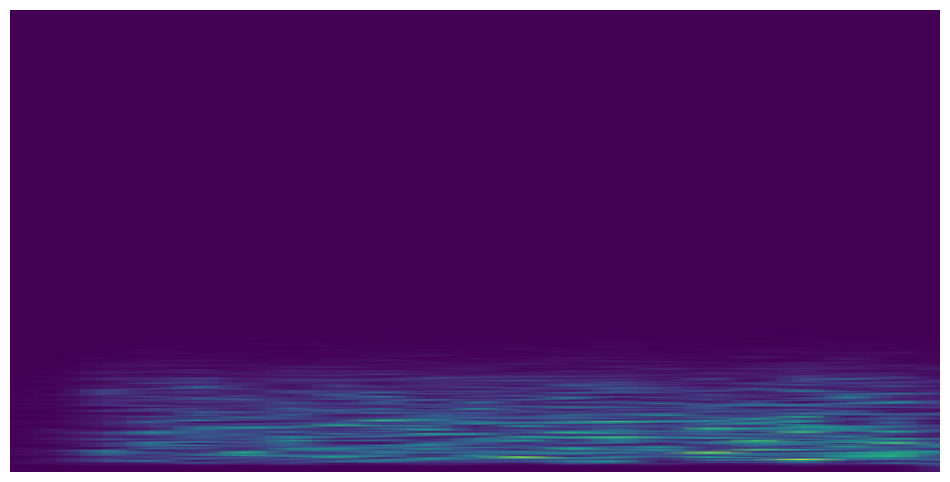

   Processed Signal
0          0.000192
1         -0.001340
2         -0.002753
3         -0.003944
4         -0.004848


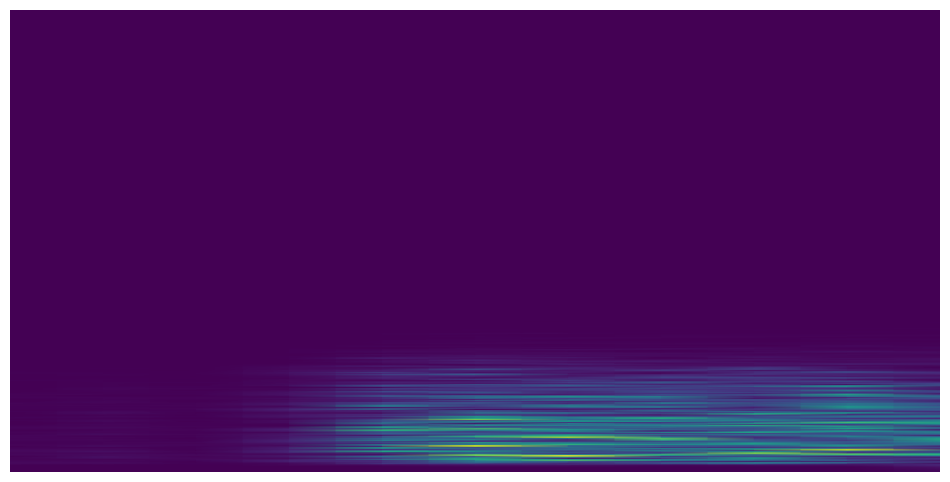

   Processed Signal
0         -0.000288
1          0.001896
2          0.003643
3          0.004650
4          0.004830


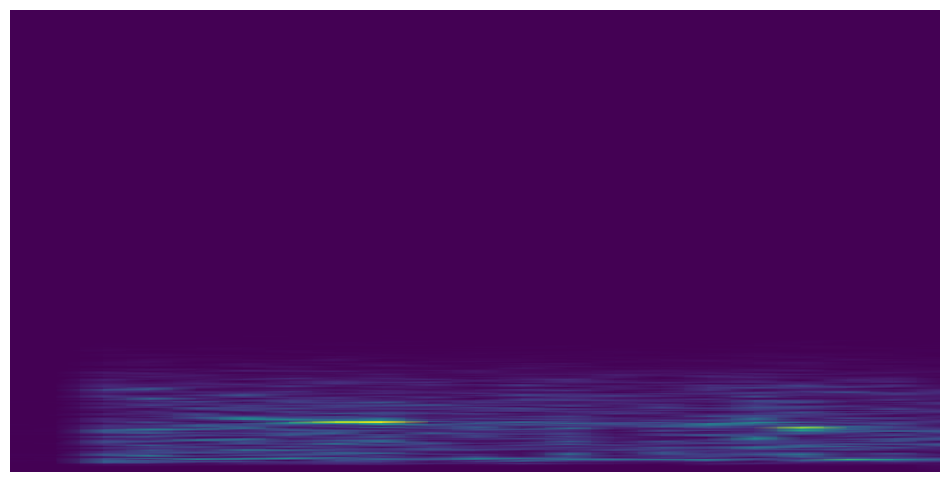

   Processed Signal
0         -0.000077
1          0.000181
2          0.000337
3          0.000335
4          0.000183


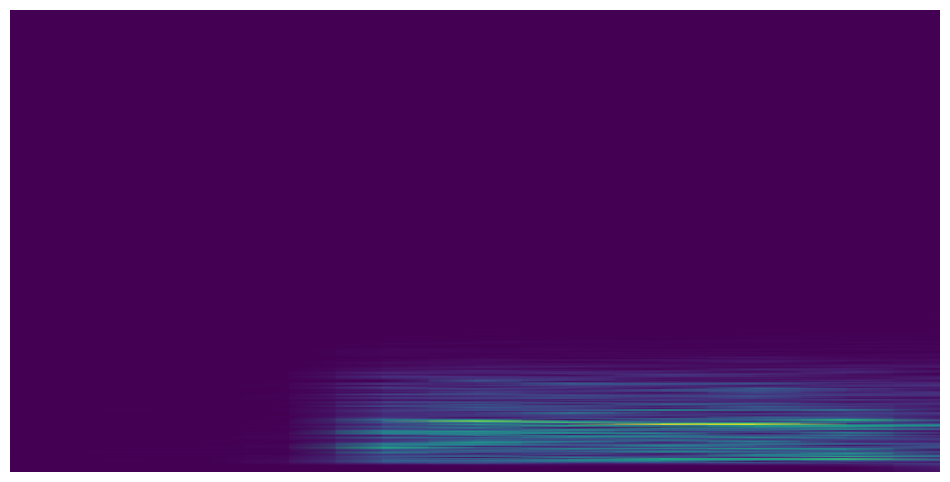

   Processed Signal
0          0.000075
1          0.001927
2          0.003393
3          0.004203
4          0.004269


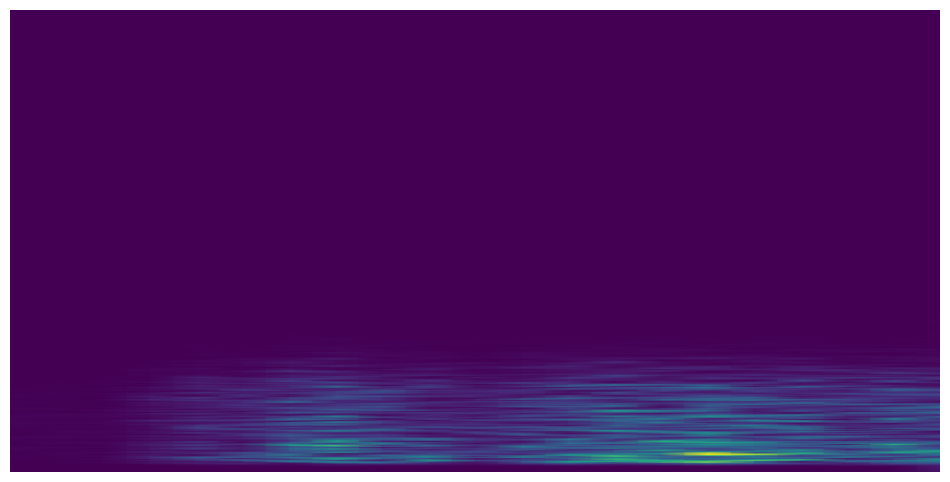

   Processed Signal
0         -0.000325
1          0.000312
2          0.000745
3          0.000844
4          0.000598


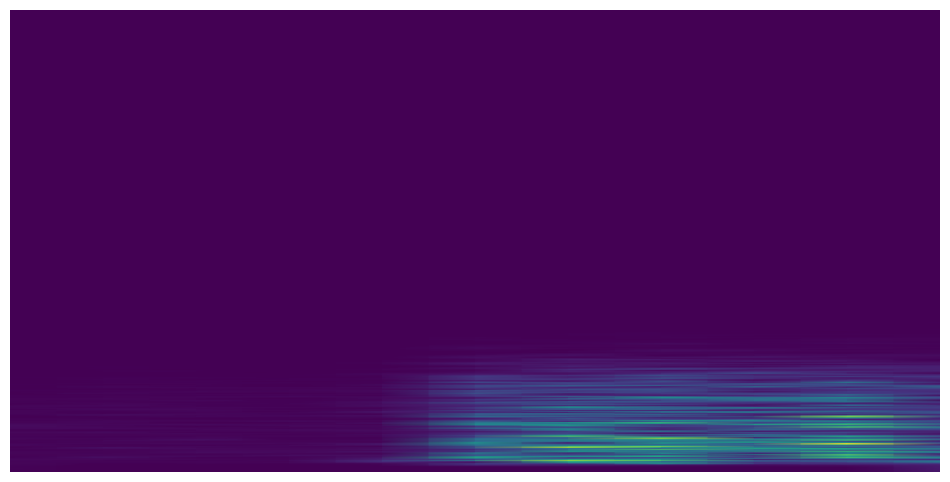

   Processed Signal
0          0.000810
1         -0.001136
2         -0.002473
3         -0.002875
4         -0.002434


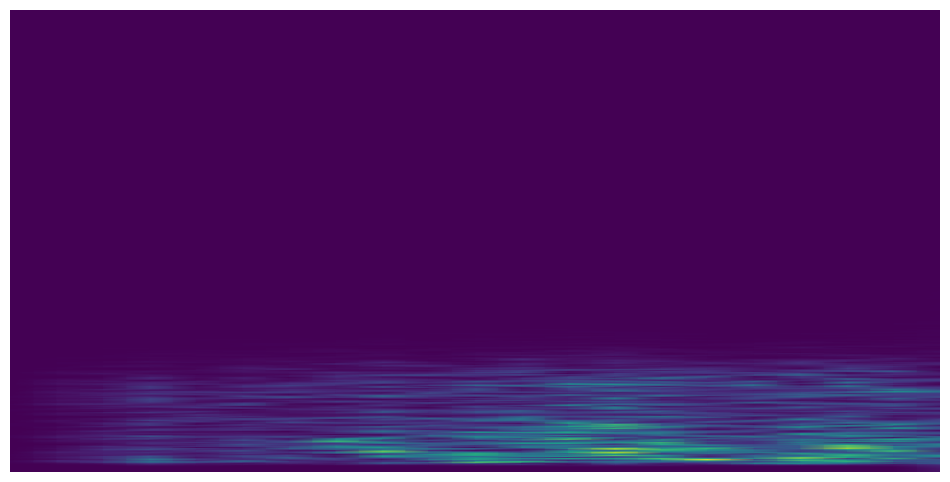

   Processed Signal
0          0.000047
1          0.000445
2          0.000766
3          0.000958
4          0.001004


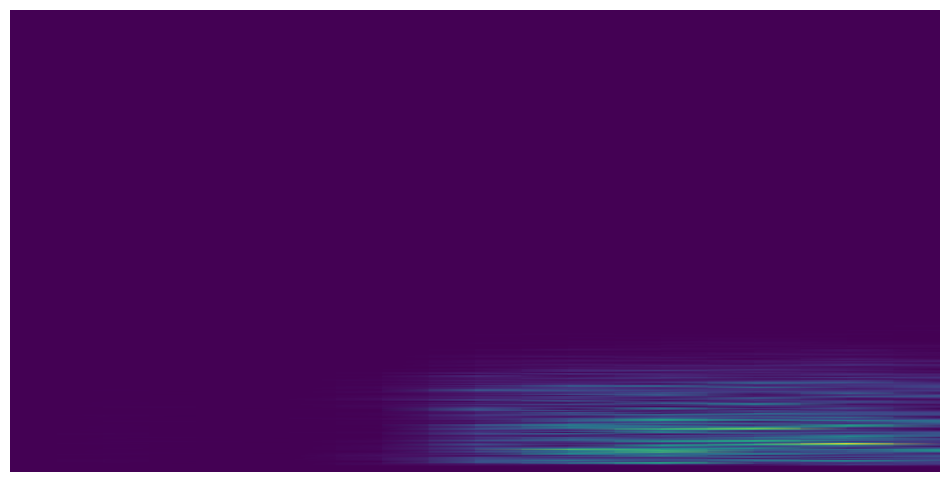

   Processed Signal
0          0.000046
1          0.000375
2          0.000690
3          0.000977
4          0.001227


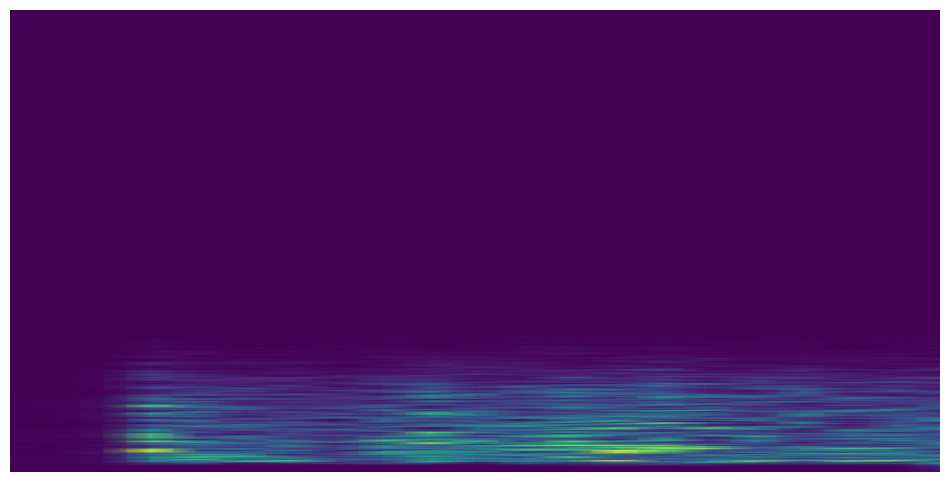

   Processed Signal
0          0.000009
1         -0.000254
2         -0.000541
3         -0.000844
4         -0.001100


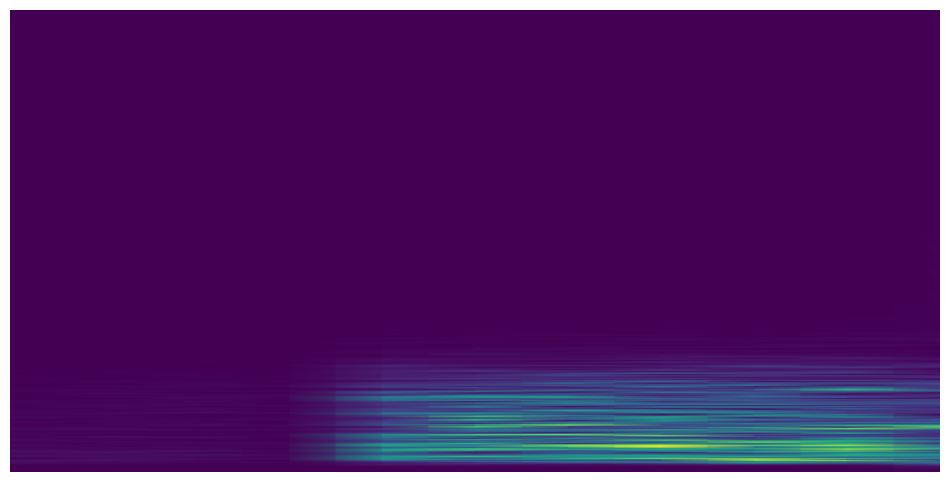

   Processed Signal
0          0.000680
1          0.000278
2         -0.000150
3         -0.000586
4         -0.000965


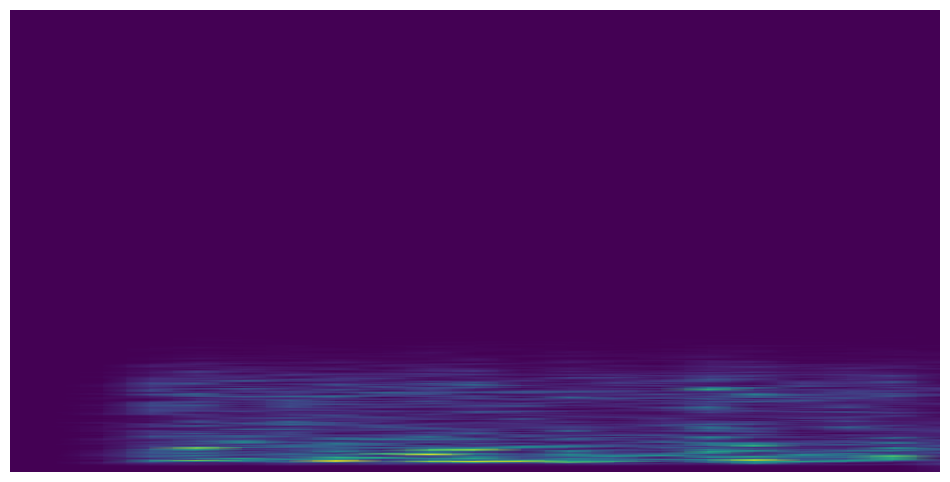

   Processed Signal
0          0.000001
1         -0.000017
2          0.000065
3          0.000286
4          0.000599


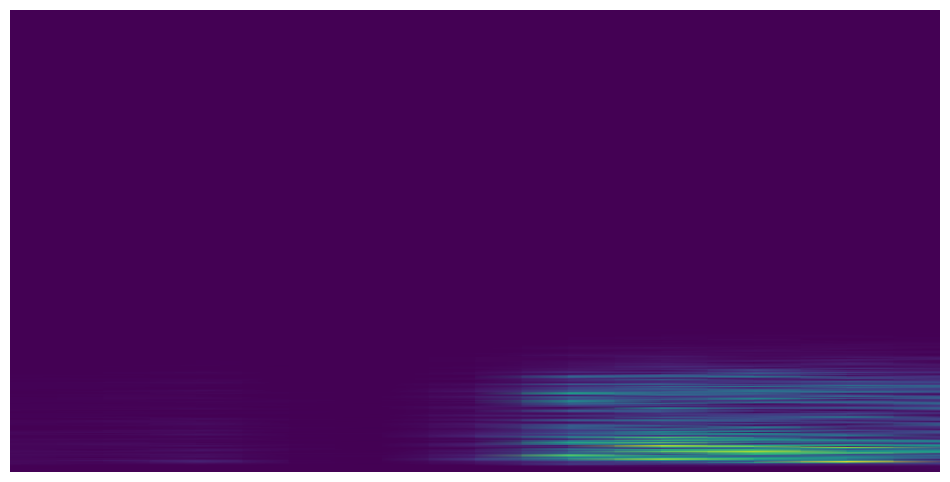

   Processed Signal
0          0.000040
1         -0.002301
2         -0.004321
3         -0.005790
4         -0.006614


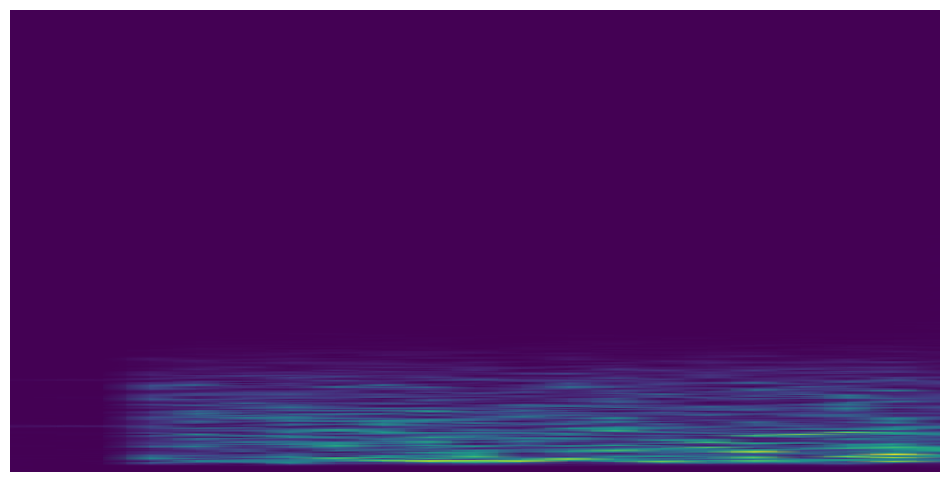

   Processed Signal
0         -0.000175
1          0.000128
2          0.000478
3          0.000912
4          0.001446


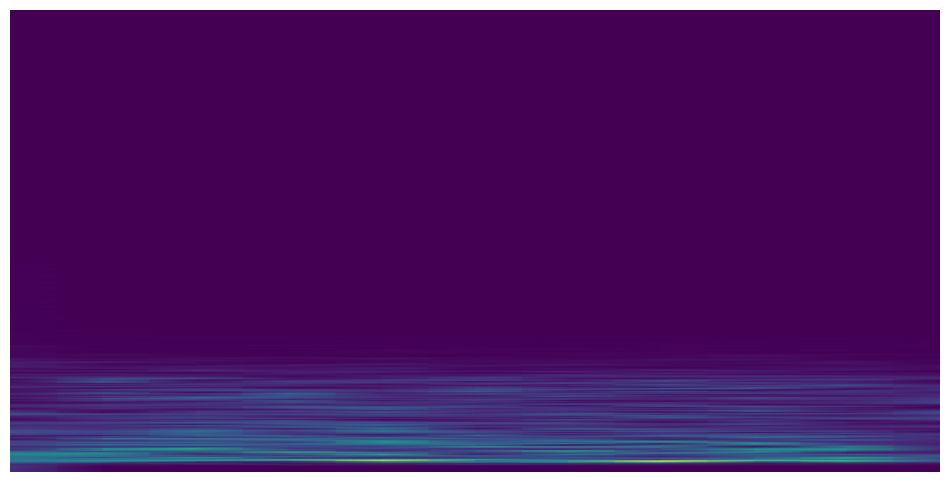

   Processed Signal
0          0.020390
1          0.120864
2          0.200166
3          0.244737
4          0.252762


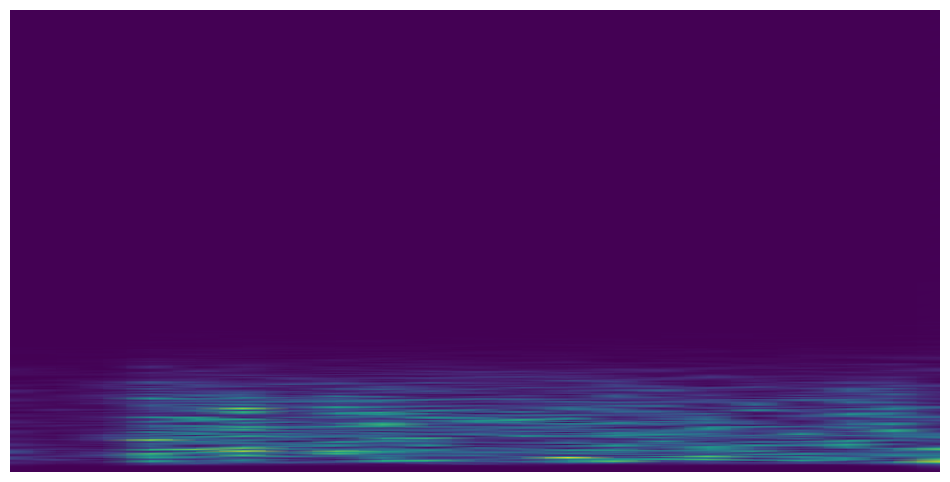

   Processed Signal
0         -0.001265
1          0.001686
2          0.004316
3          0.006167
4          0.006641


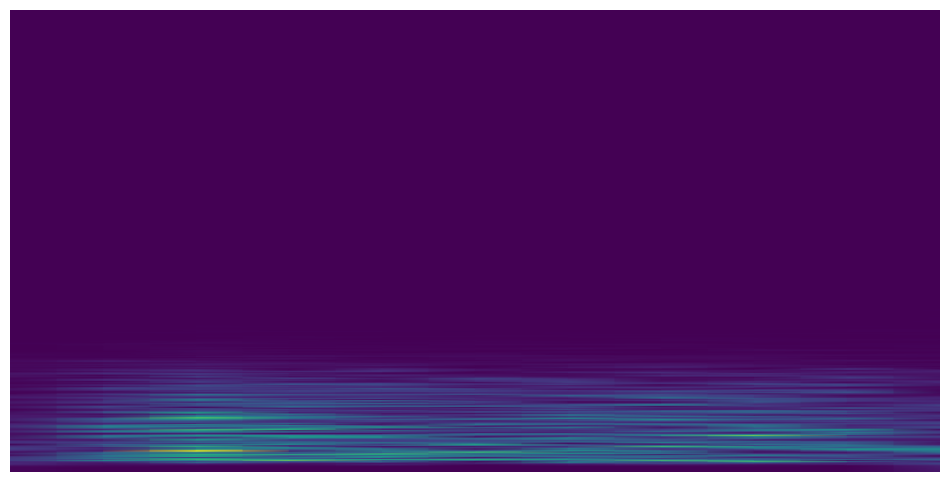

   Processed Signal
0          0.003952
1         -0.002911
2         -0.008290
3         -0.011020
4         -0.010575


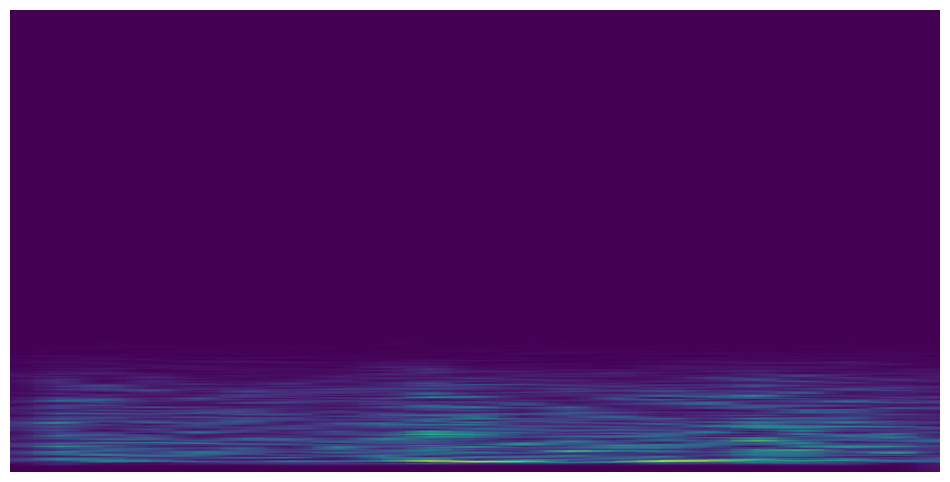

   Processed Signal
0         -0.000435
1         -0.006681
2         -0.011220
3         -0.012734
4         -0.010639


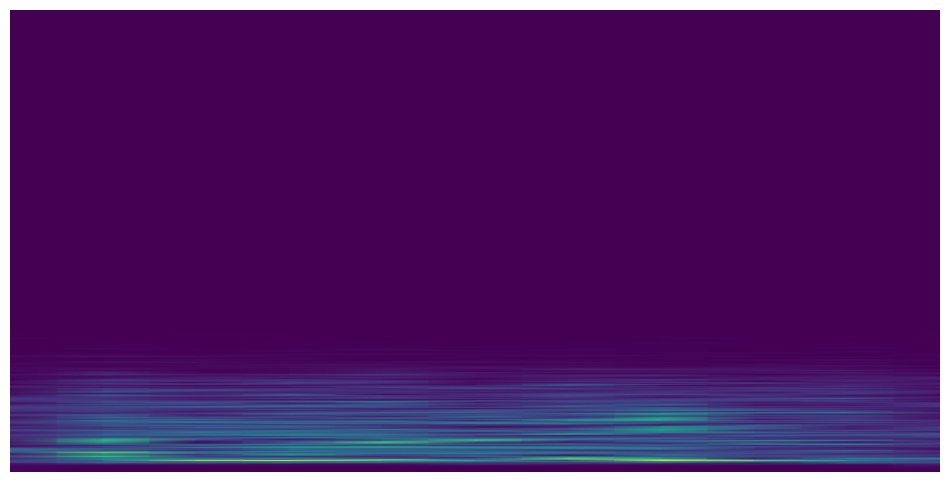

   Processed Signal
0         -0.004742
1          0.009453
2          0.020358
3          0.025901
4          0.025853


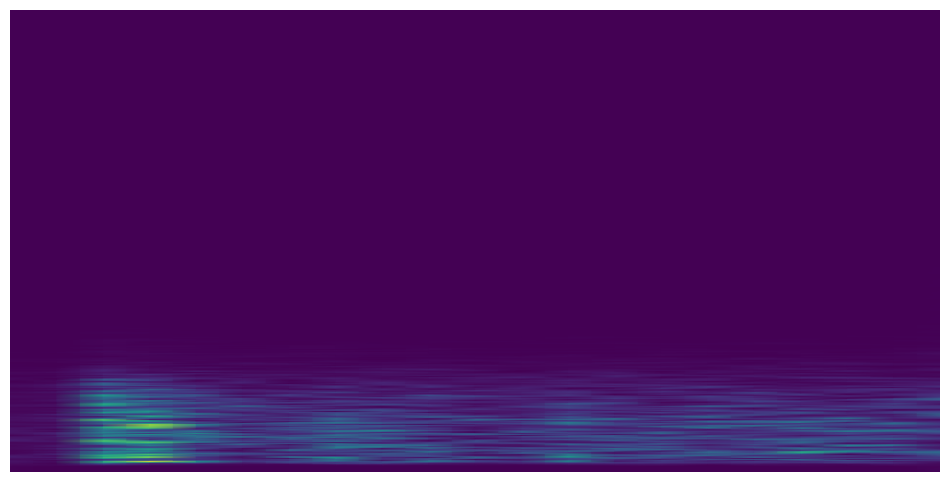

   Processed Signal
0          0.002717
1         -0.002162
2         -0.006466
3         -0.009682
4         -0.011433


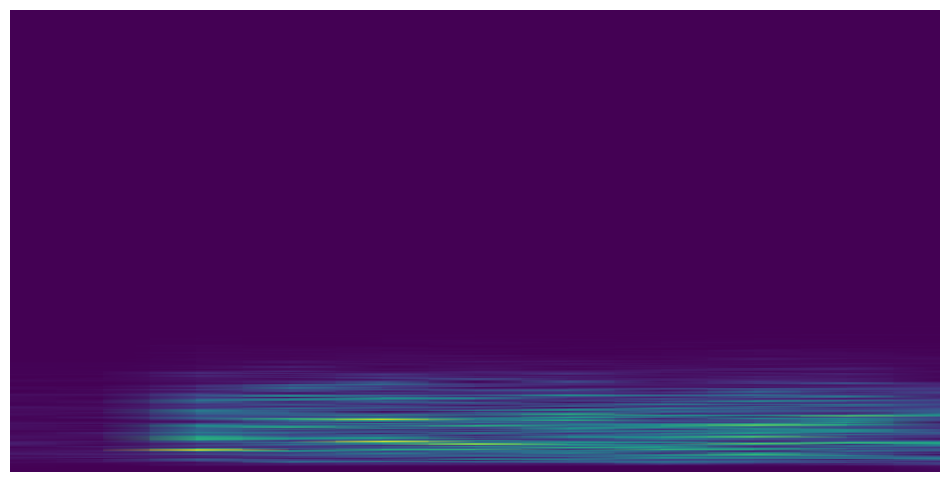

   Processed Signal
0         -0.001838
1         -0.002345
2         -0.002773
3         -0.003168
4         -0.003739


In [ ]:
# Path ke folder yang berisi file CSV non fatigue
folder_path_non_fatigue = '/content/gdrive/MyDrive/ASB/ASB_clean/non fatigue/'
output_folder = '/content/spectrograms_nonfatigue'  # Folder untuk menyimpan spectrogram

# Buat folder output jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Dictionary untuk menyimpan DataFrame hasil pemrosesan
processed_dataframes = {}
spectrograms = []

# Loop melalui setiap nama file non fatigue
for file_name_non_fatigue in file_names_non_fatigue:

    # Menghapus bagian nama yang mengandung "csv", "h5", "nf"
    file_name_non_fatigue_fix = file_name_non_fatigue.replace(".h5", "")
    file_name_non_fatigue_clear = file_name_non_fatigue_fix.replace(".csv", "")
    file_name_non_fatigue_cleaned = file_name_non_fatigue_clear.replace("nf", "NF")

    # Path ke file CSV non fatigue
    file_path_non_fatigue = os.path.join(folder_path_non_fatigue, file_name_non_fatigue)

    # Mendefinisikan rentang yang akan disimpan (dalam indeks)
    ranges_to_keep_non_fatigue = [(15000, 25000), (30000, 35000)]

    # Memuat dan memfilter data non fatigue
    data_segmented_non_fatigue = load_and_filter_data(file_path_non_fatigue, ranges_to_keep_non_fatigue)

    # Membagi data menjadi dua segmen
    data_segment_15_25 = data_segmented_non_fatigue[0:10000]  # 15-25 detik
    data_segment_30_35 = data_segmented_non_fatigue[10000:]   # 30-35 detik

    for i, data_segment in enumerate([data_segment_15_25, data_segment_30_35], start=1):
        # Menormalisasi data
        data_normalized = normalisasi(data_segment)

        # Menerapkan filter Butterworth bandpass
        data_filtered = butterworth_filter(data_normalized, lowcut, highcut, fs)

        # Nama file output untuk spectrogram
        output_filename = os.path.join(output_folder, f'{file_name_non_fatigue_cleaned}_Segment_{i}.png')

        # Menyimpan spectrogram sebagai gambar
        save_stft(data_filtered, fs, output_filename)

        # Buat DataFrame untuk sinyal yang telah diproses
        df_processed_signal = pd.DataFrame({'Processed Signal': data_filtered})

        # Menyimpan DataFrame dalam dictionary dengan kunci gabungan nama file dan segmen
        key = f'{file_name_non_fatigue_cleaned}_Segment_{i}'
        processed_dataframes[key] = df_processed_signal
        print(df_processed_signal.head())

In [ ]:
# Cetak daftar variabel data yang diperoleh
for key in processed_dataframes.keys():
    print(key)

aida_NF_Segment_1
aida_NF_Segment_2
aldhito_NF_Segment_1
aldhito_NF_Segment_2
azka_NF_Segment_1
azka_NF_Segment_2
caca_NF_Segment_1
caca_NF_Segment_2
Christi_NF_Segment_1
Christi_NF_Segment_2
giselle_NF_Segment_1
giselle_NF_Segment_2
Faris_NF_Segment_1
Faris_NF_Segment_2
Hasna_NF_Segment_1
Hasna_NF_Segment_2
insan_NF_Segment_1
insan_NF_Segment_2
Khayla_NF_Segment_1
Khayla_NF_Segment_2
Nae_NF_Segment_1
Nae_NF_Segment_2
nazhir_NF_Segment_1
nazhir_NF_Segment_2
Nazla_NF_Segment_1
Nazla_NF_Segment_2
niken_NF_Segment_1
niken_NF_Segment_2
niko_NF_Segment_1
niko_NF_Segment_2
putri_NF_Segment_1
putri_NF_Segment_2
raffa_NF_Segment_1
raffa_NF_Segment_2
Rona_NF_Segment_1
Rona_NF_Segment_2
Shalsa_NF_Segment_1
Shalsa_NF_Segment_2
tyo_NF_Segment_1
tyo_NF_Segment_2
umar_NF_Segment_1
umar_NF_Segment_2
iqbal_NF_Segment_1
iqbal_NF_Segment_2
ipul_NF_Segment_1
ipul_NF_Segment_2
jeki_NF_Segment_1
jeki_NF_Segment_2
syifa_NF_Segment_1
syifa_NF_Segment_2
tarisa_NF_Segment_1
tarisa_NF_Segment_2


### Fatigue

In [ ]:
# Daftar nama file fatigue
file_names_fatigue = [
    'nazhir_F.csv',
    'aida_F.csv',
    'aldhito_F.csv',
    'azka_F.csv',
    'caca_F.csv',
    'Christi_F.csv',
    'Faris_F.csv',
    'giselle_F.csv',
    'Hasna_F.csv',
    'insan_F.csv',
    'iqbal_F.csv',
    'Khayla_F.csv',
    'nae_F.csv',
    'Nazla_F.csv',
    'Niken_F.csv',
    'niko_F.csv',
    'putri_F.csv',
    'raffa_F.csv',
    'Rona_F.csv',
    'Shalsa_F.csv',
    'tyo_F.csv',
    'umar_F.csv',
    'ipul_F.csv',
    'jeki_F.csv',
    'sipa_F.csv',
    'tarisa_F.csv'
]

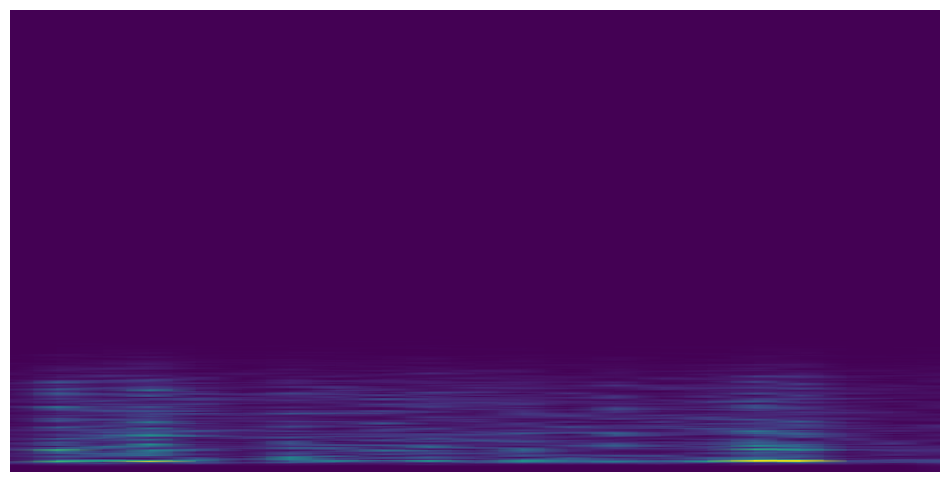

   Processed Signal
0          0.003999
1          0.001481
2          0.000015
3          0.000183
4          0.001805


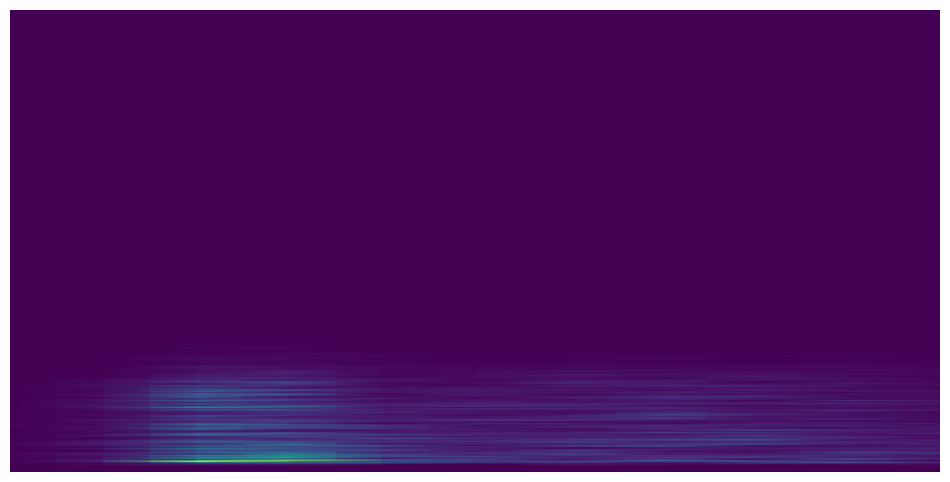

   Processed Signal
0         -0.000209
1          0.001188
2          0.002066
3          0.002125
4          0.001399


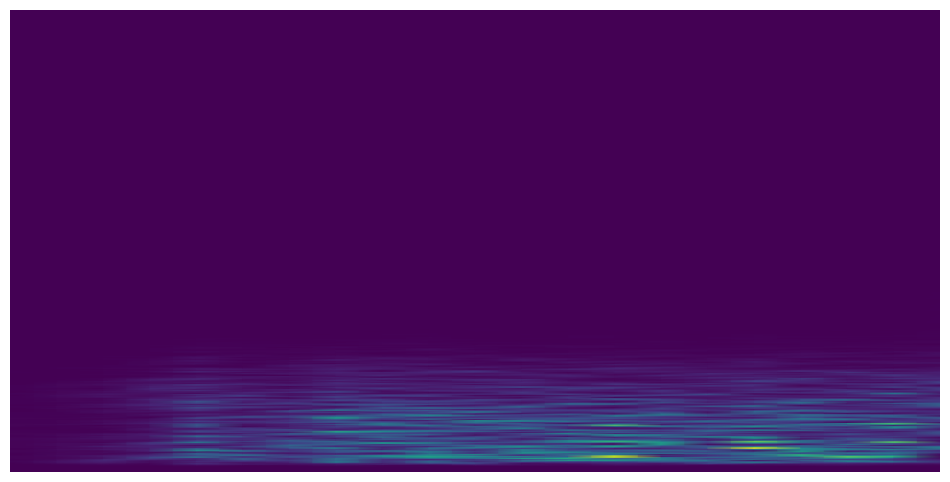

   Processed Signal
0         -0.000862
1         -0.005998
2         -0.009368
3         -0.009797
4         -0.007102


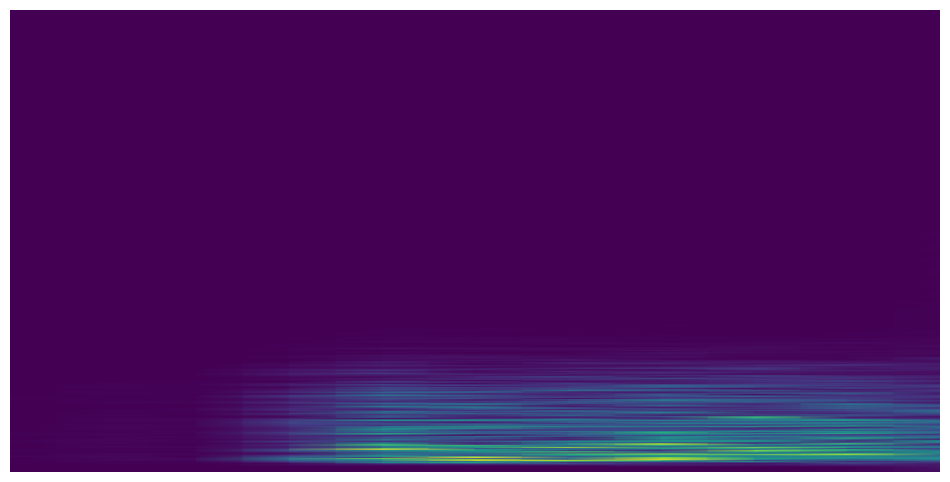

   Processed Signal
0         -0.000102
1         -0.000478
2         -0.000730
3         -0.000791
4         -0.000681


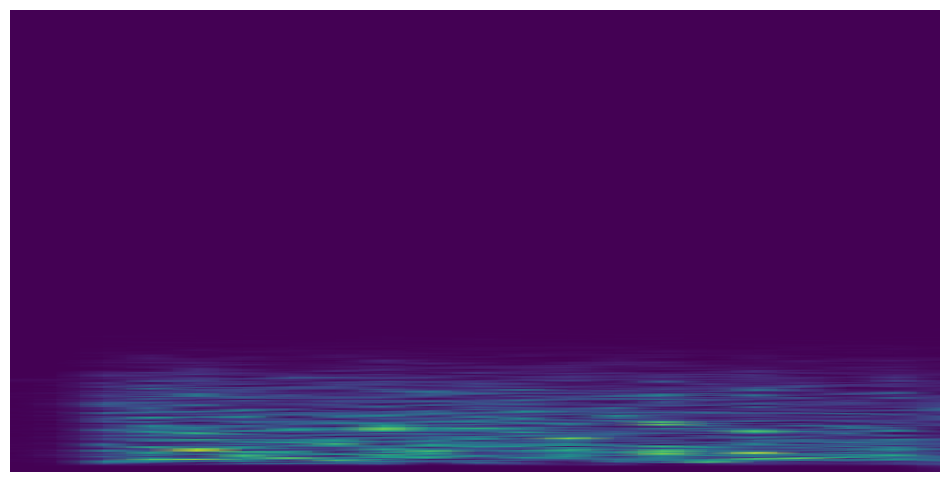

   Processed Signal
0         -0.000440
1         -0.003075
2         -0.005419
3         -0.007156
4         -0.007971


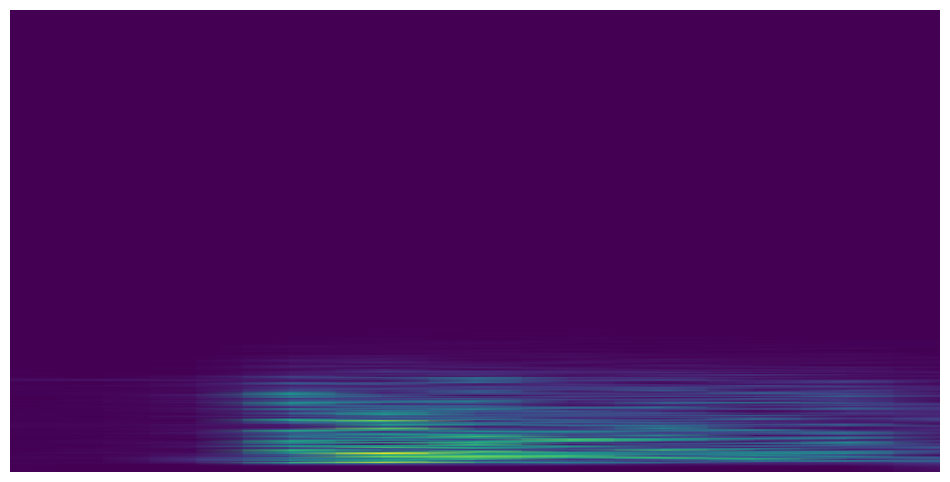

   Processed Signal
0         -0.000643
1          0.001330
2          0.002725
3          0.003248
4          0.003010


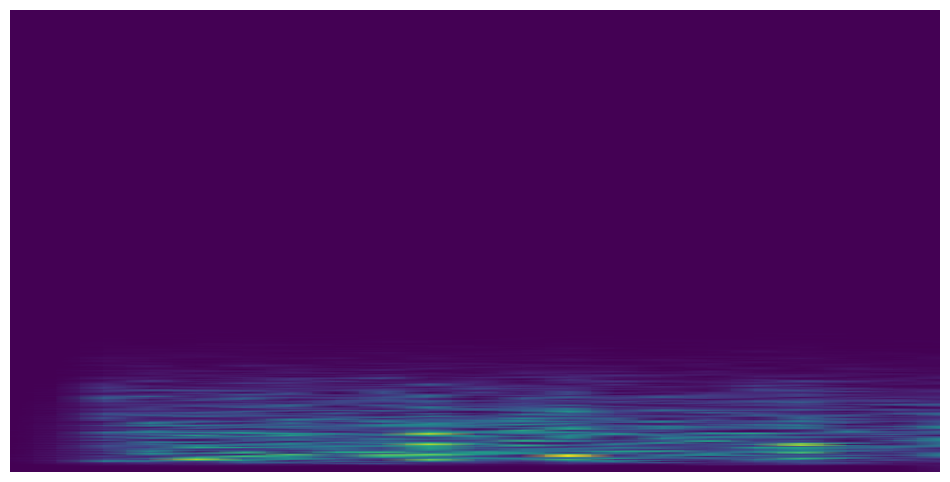

   Processed Signal
0         -0.000299
1         -0.000531
2         -0.000708
3         -0.000791
4         -0.000769


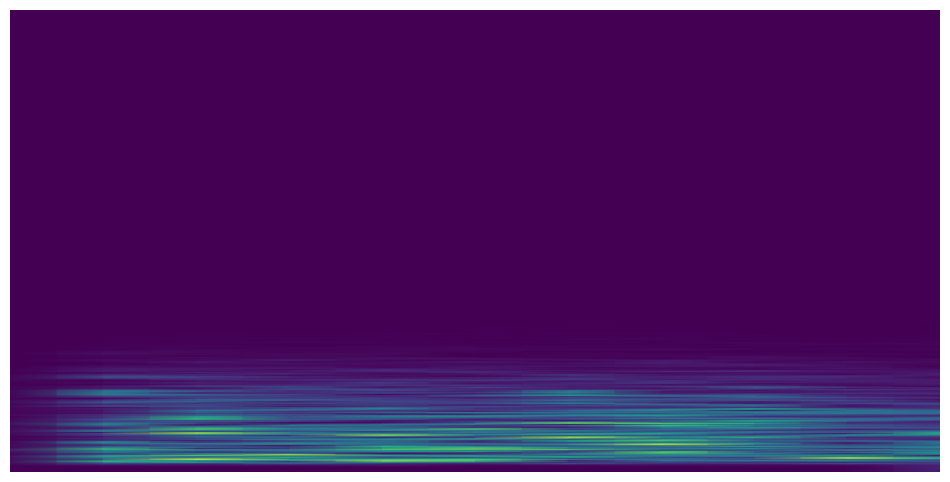

   Processed Signal
0          0.000280
1          0.001226
2          0.001888
3          0.002098
4          0.001870


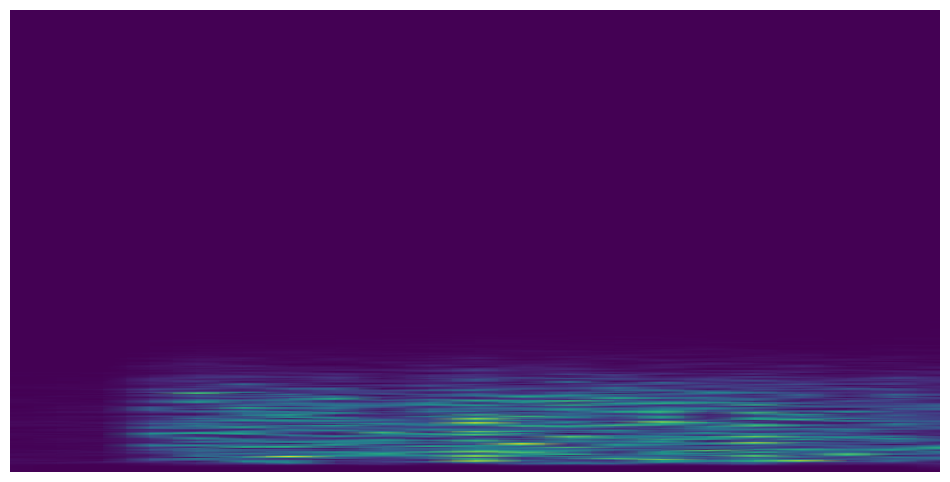

   Processed Signal
0         -0.000069
1         -0.003171
2         -0.005765
3         -0.007477
4         -0.008163


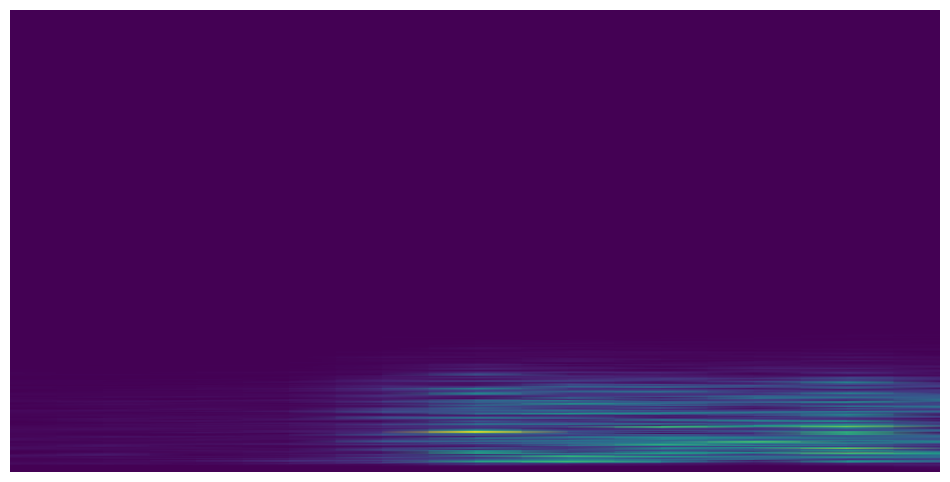

   Processed Signal
0         -0.000616
1         -0.003734
2         -0.006192
3         -0.007448
4         -0.007188


   Processed Signal
0         -0.000018
1          0.001432
2          0.002595
3          0.003259
4          0.003347


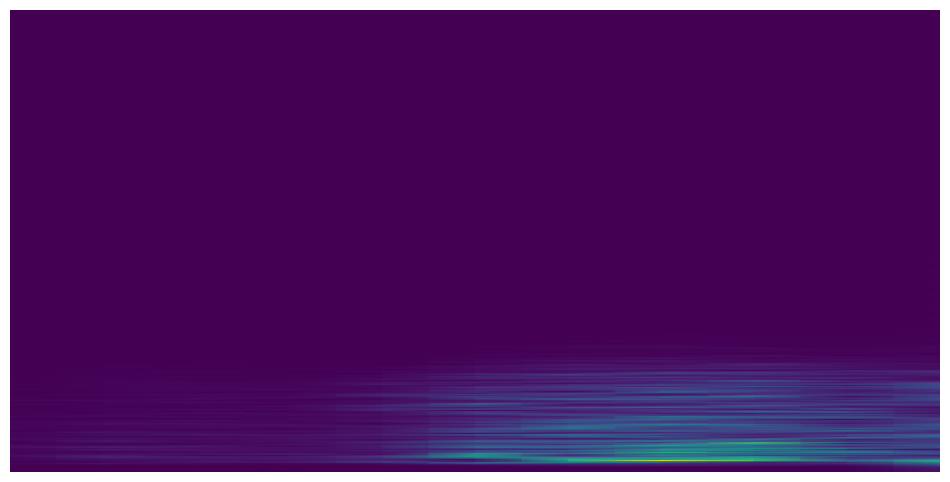

   Processed Signal
0          0.000044
1          0.000614
2          0.001176
3          0.001736
4          0.002310


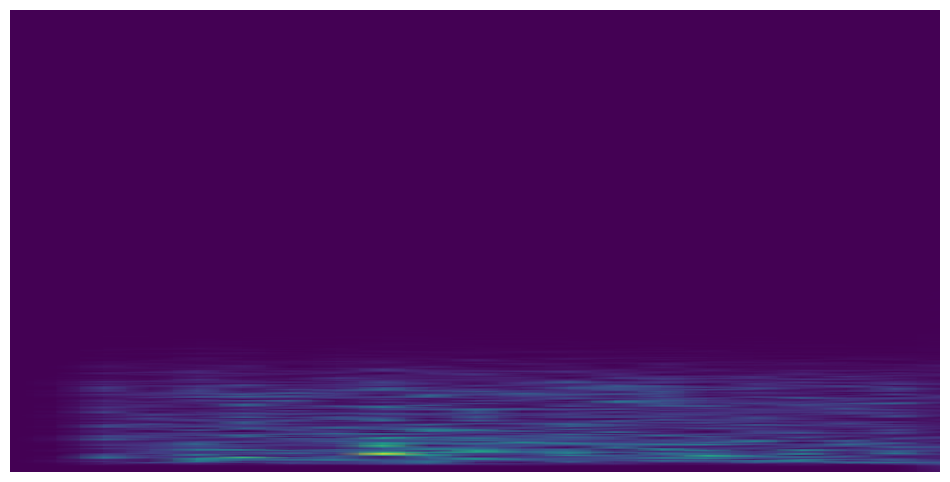

   Processed Signal
0          0.000014
1          0.000181
2          0.000286
3          0.000287
4          0.000172


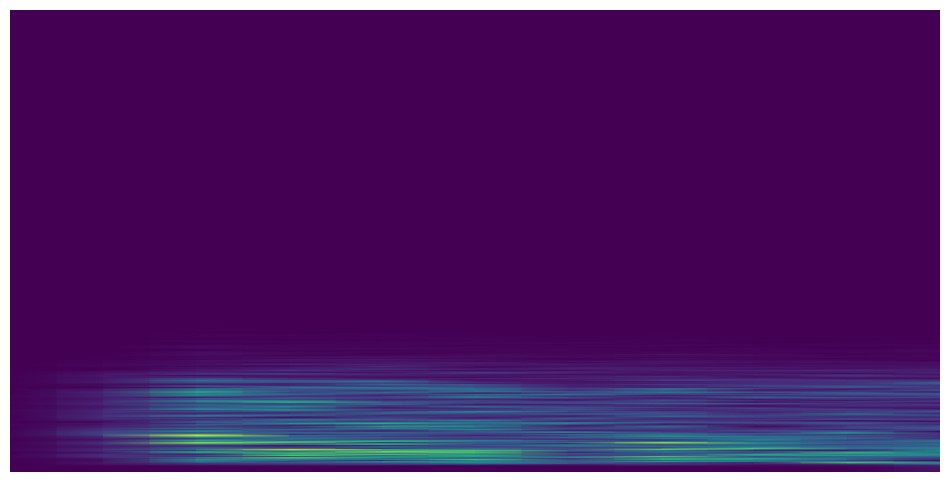

   Processed Signal
0         -0.000020
1          0.000733
2          0.001369
3          0.001801
4          0.001987


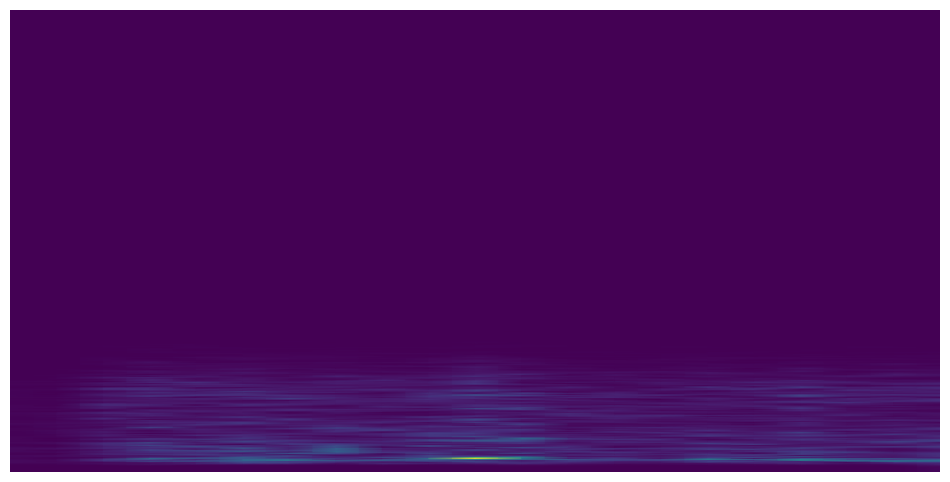

   Processed Signal
0          0.000112
1          0.000567
2          0.000901
3          0.001064
4          0.001099


   Processed Signal
0         -0.000430
1          0.000187
2          0.000723
3          0.001118
4          0.001349


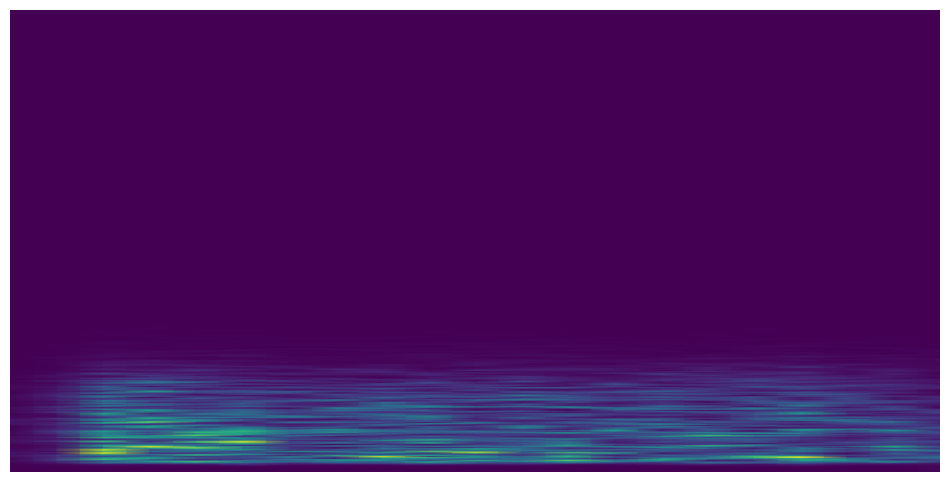

   Processed Signal
0          0.000383
1          0.001626
2          0.002762
3          0.003690
4          0.004327


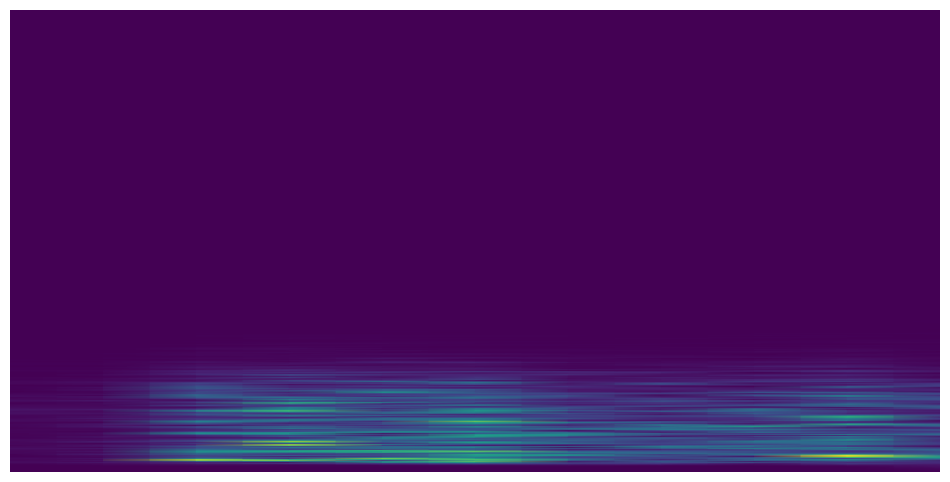

   Processed Signal
0          0.000190
1         -0.003601
2         -0.005979
3         -0.006008
4         -0.003547


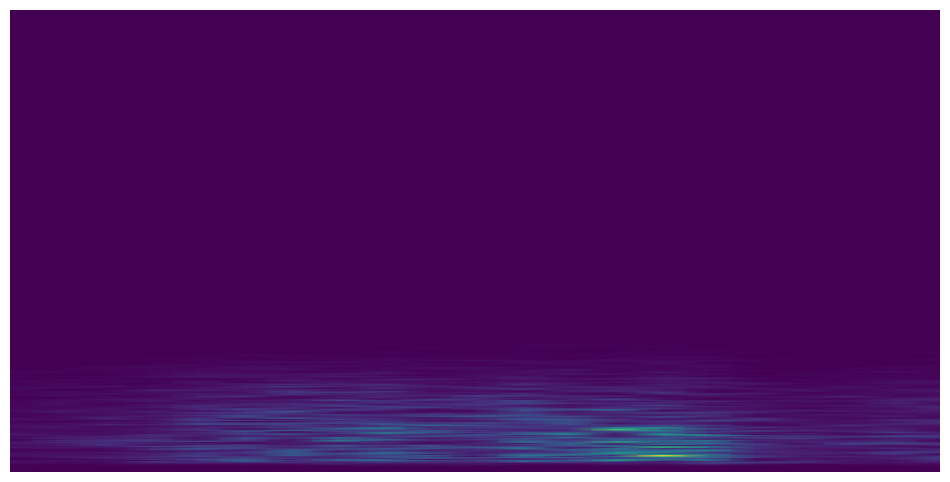

   Processed Signal
0         -0.000733
1         -0.006316
2         -0.010939
3         -0.014016
4         -0.015455


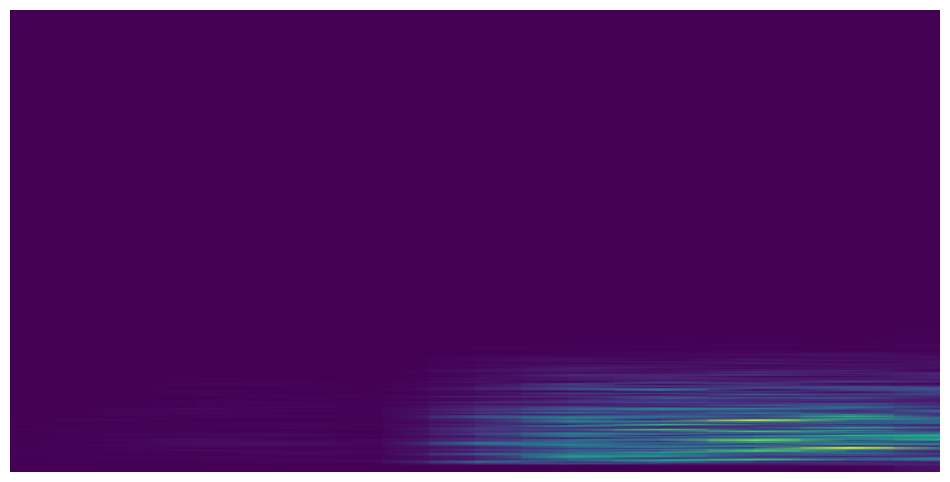

   Processed Signal
0         -0.000357
1          0.000542
2          0.001333
3          0.001902
4          0.002138


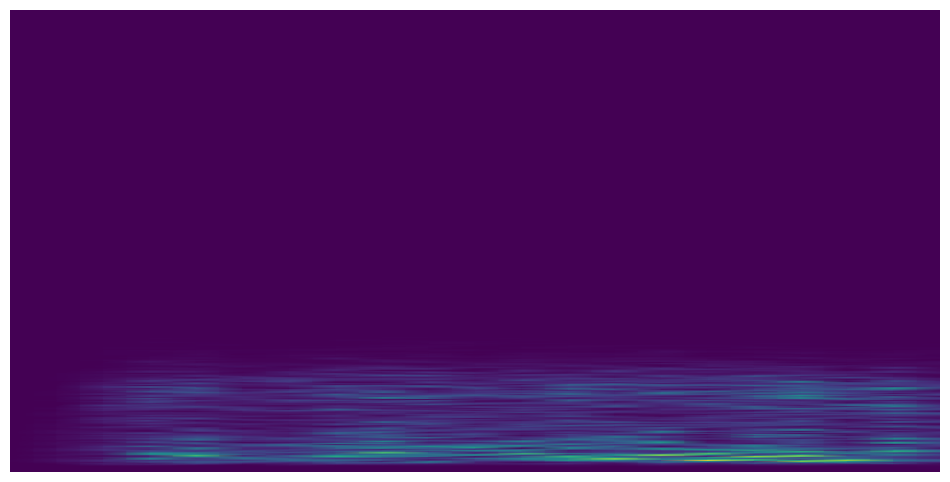

   Processed Signal
0         -0.000148
1         -0.000207
2         -0.000134
3          0.000144
4          0.000616


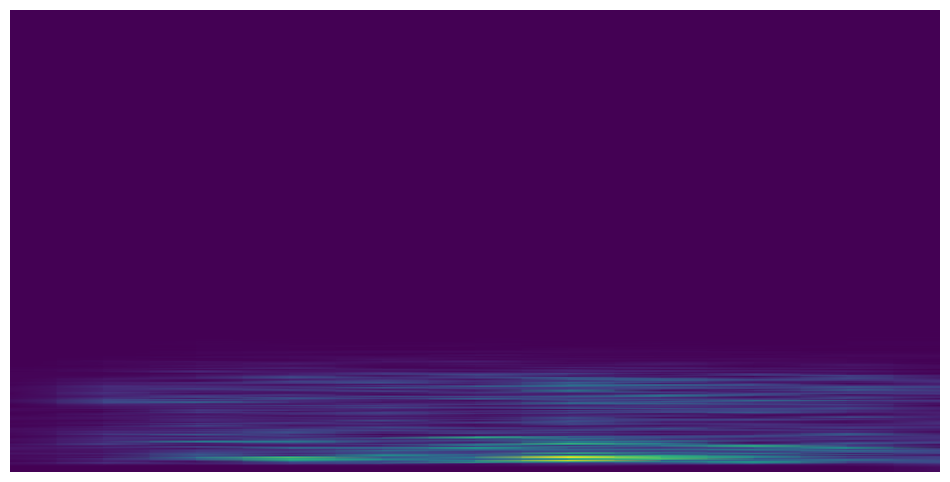

   Processed Signal
0          0.001546
1         -0.001868
2         -0.003618
3         -0.002771
4          0.000428


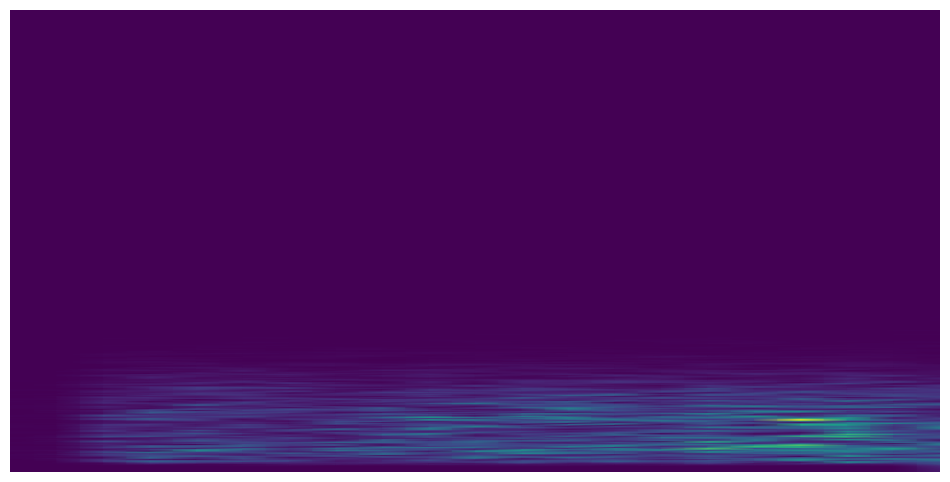

   Processed Signal
0          0.000027
1          0.001437
2          0.002527
3          0.003069
4          0.002995


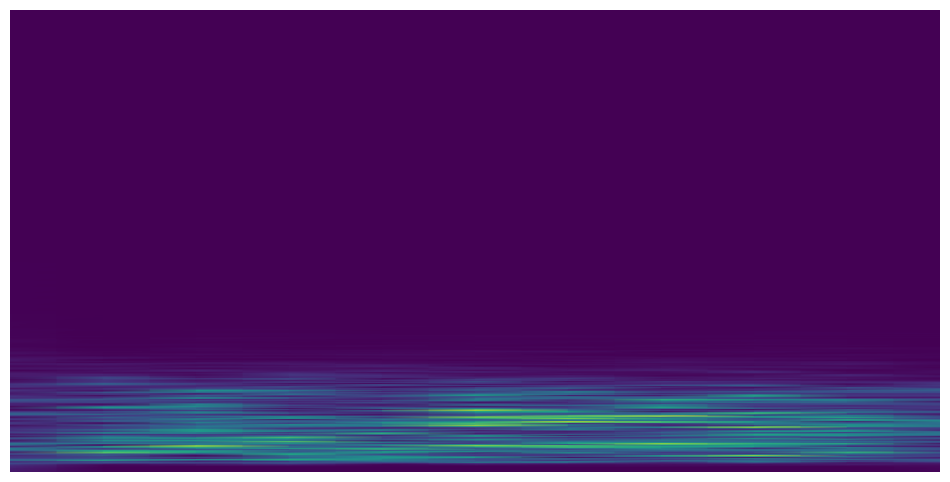

   Processed Signal
0         -0.003420
1         -0.057420
2         -0.092942
3         -0.098685
4         -0.074839


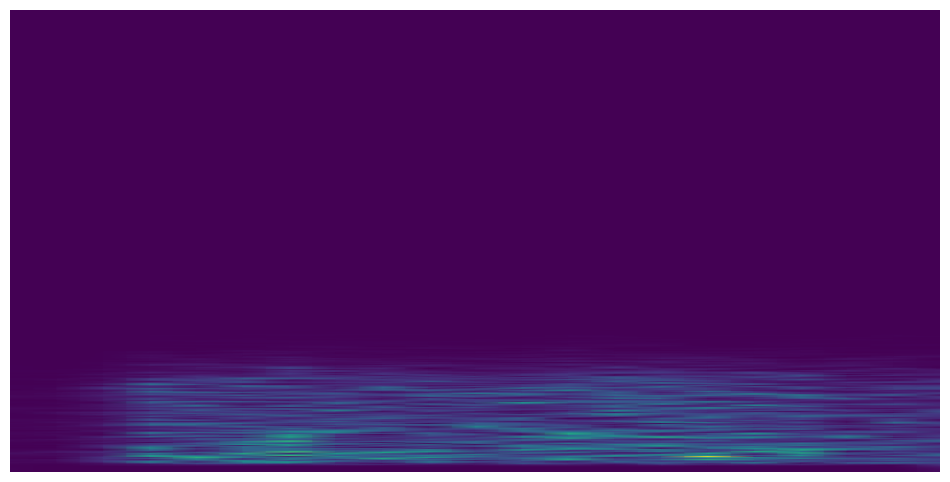

   Processed Signal
0         -0.000914
1         -0.003188
2         -0.005363
3         -0.007322
4         -0.008930


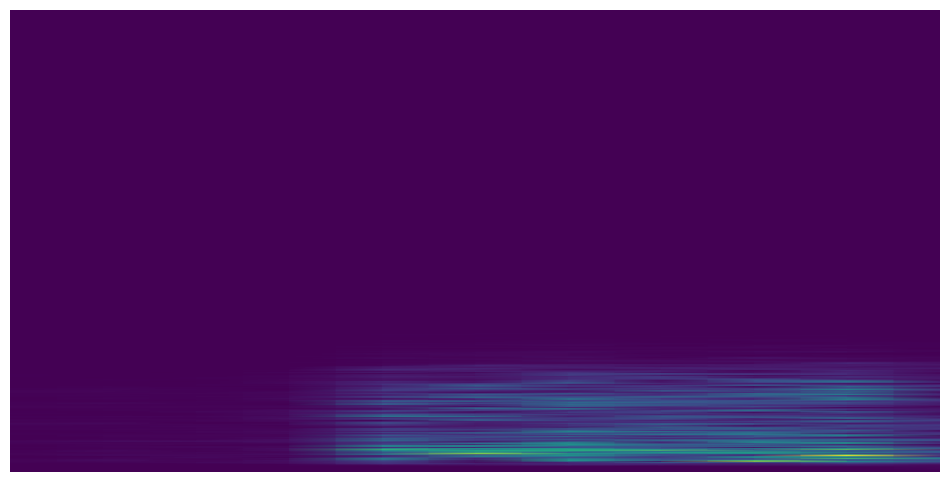

   Processed Signal
0         -0.000075
1         -0.000290
2         -0.000206
3          0.000379
4          0.001499


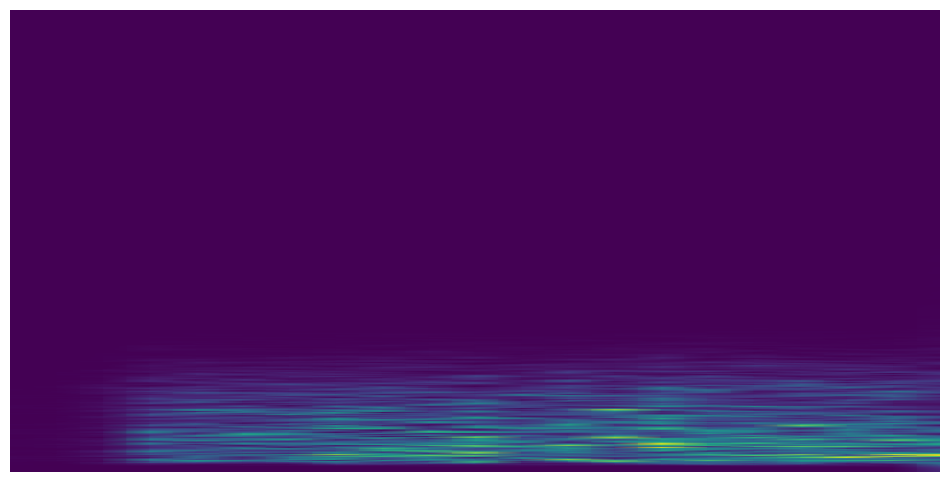

   Processed Signal
0          0.000248
1          0.001173
2          0.002032
3          0.002777
4          0.003389


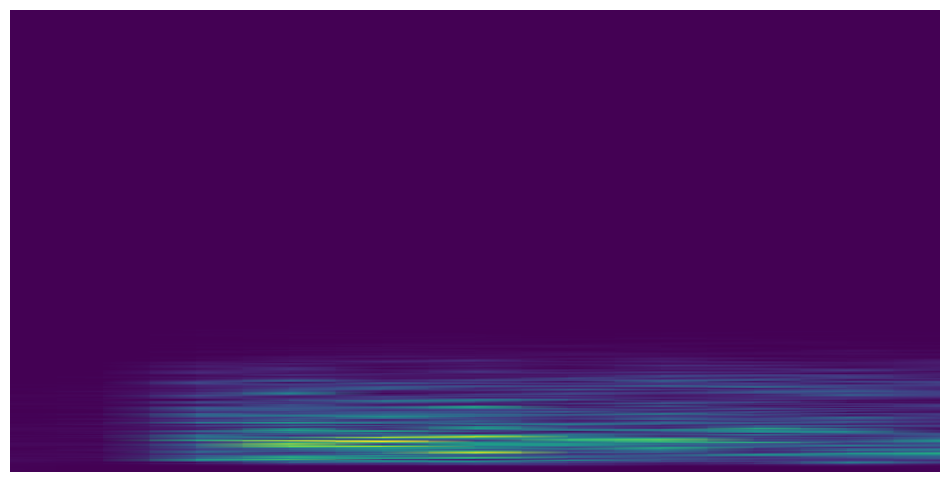

   Processed Signal
0         -0.000012
1         -0.003038
2         -0.005720
3         -0.007810
4         -0.009203


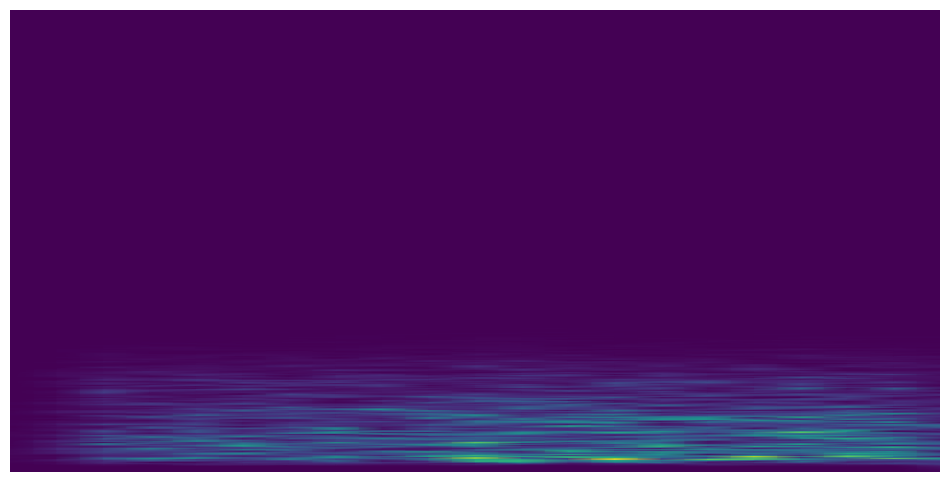

   Processed Signal
0          0.000327
1          0.001710
2          0.002784
3          0.003342
4          0.003335


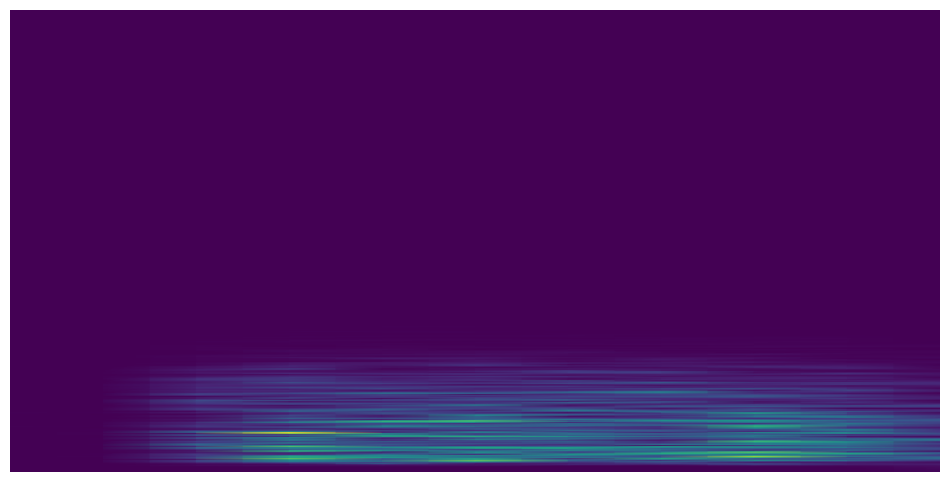

   Processed Signal
0         -0.000099
1          0.000015
2          0.000244
3          0.000654
4          0.001233


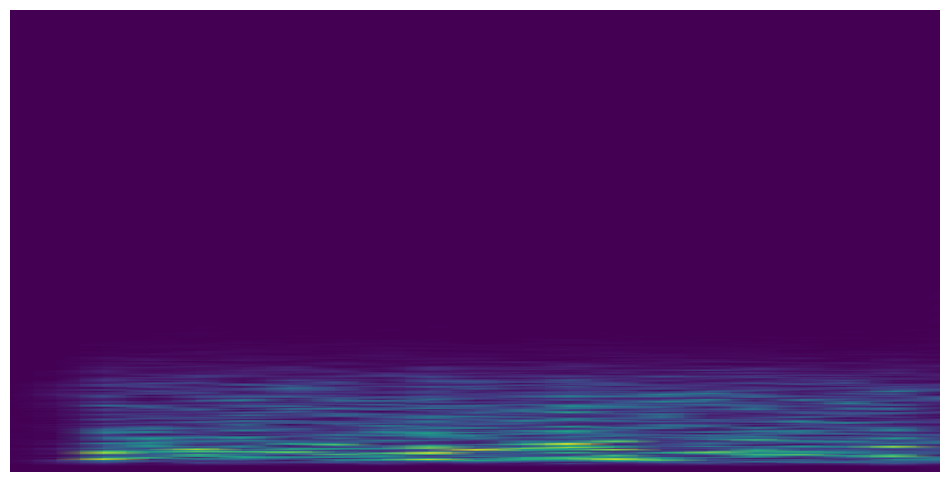

   Processed Signal
0          0.000135
1         -0.000594
2         -0.001147
3         -0.001401
4         -0.001330


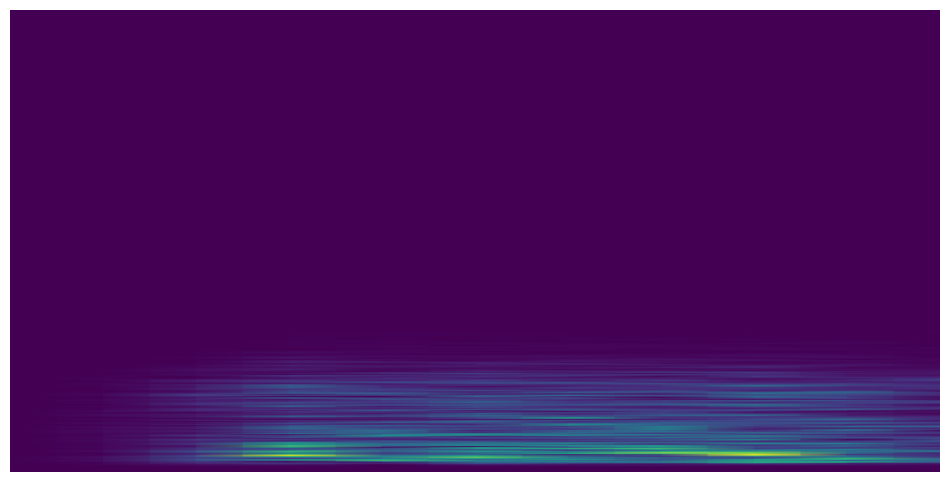

   Processed Signal
0         -0.000073
1         -0.000608
2         -0.001102
3         -0.001519
4         -0.001835


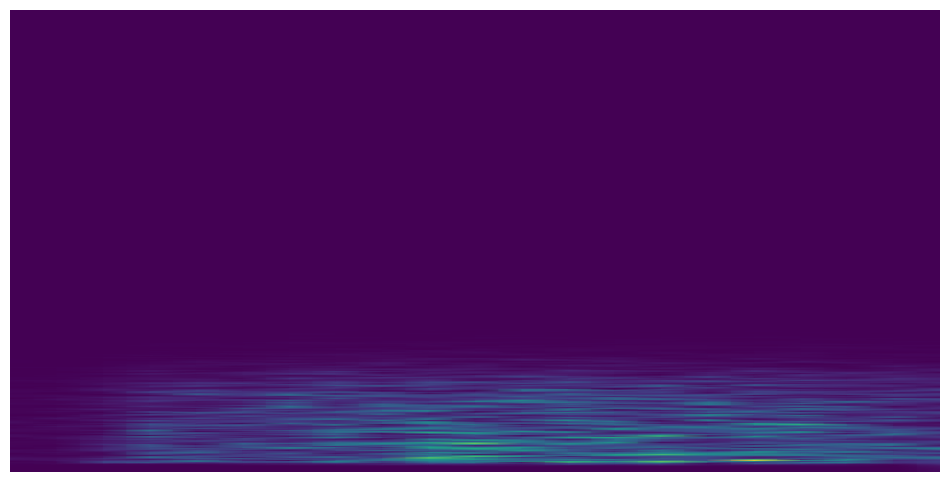

   Processed Signal
0          0.000878
1          0.008272
2          0.013772
3          0.016130
4          0.015128


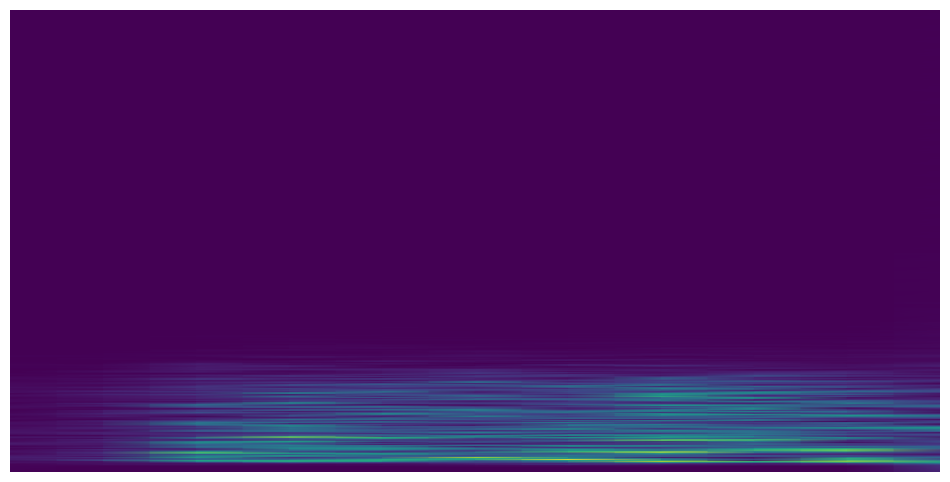

   Processed Signal
0         -0.001609
1         -0.006996
2         -0.011835
3         -0.015566
4         -0.017692


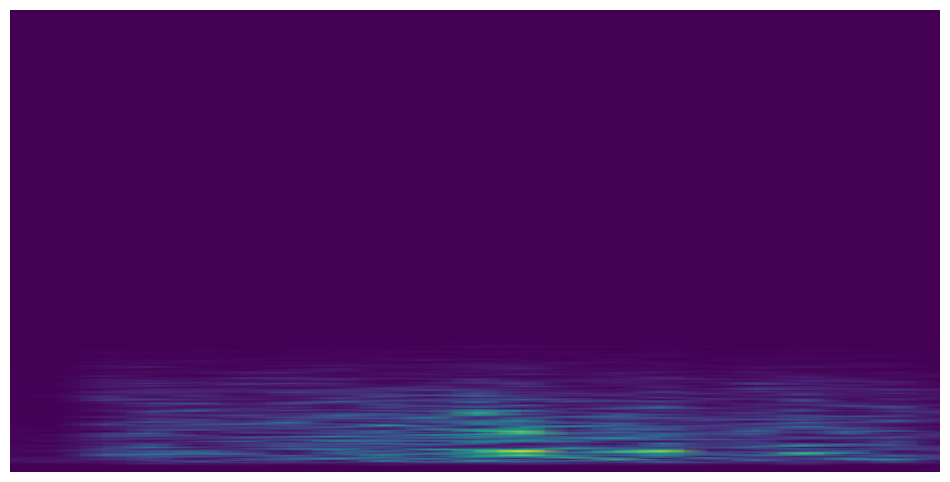

   Processed Signal
0         -0.000100
1          0.000505
2          0.001043
3          0.001463
4          0.001739


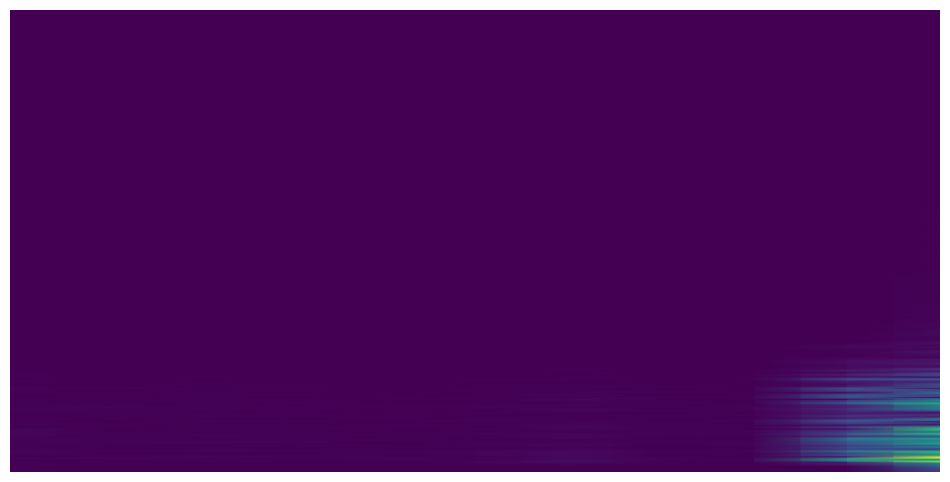

   Processed Signal
0          0.000111
1          0.006096
2          0.010669
3          0.012903
4          0.012618


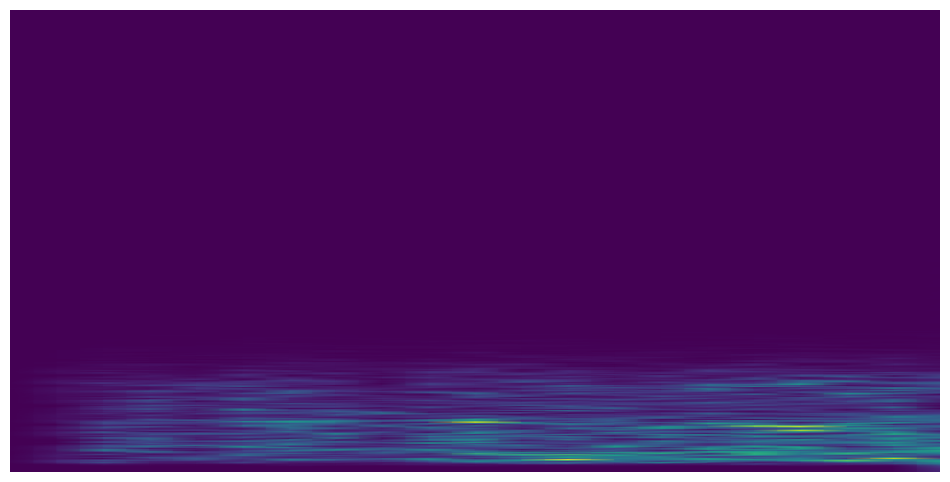

   Processed Signal
0          0.000030
1          0.000469
2          0.000795
3          0.000937
4          0.000888


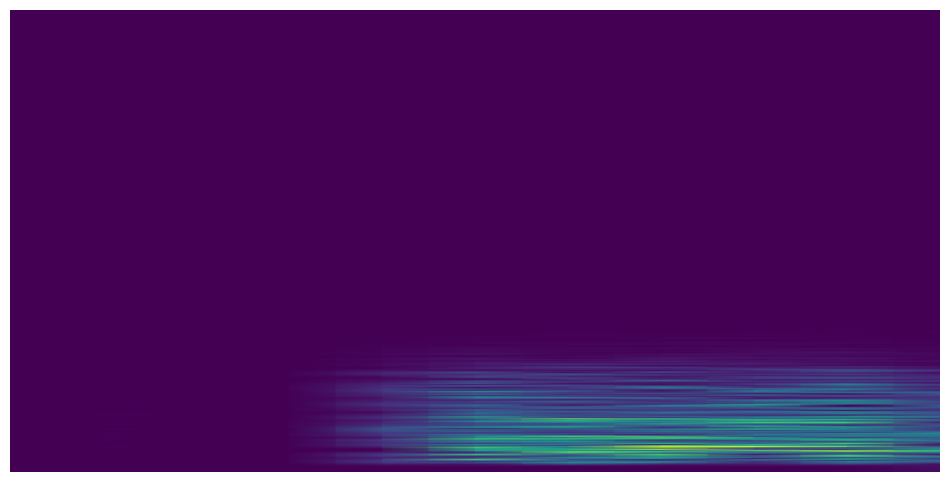

   Processed Signal
0         -0.000070
1         -0.000176
2         -0.000266
3         -0.000325
4         -0.000338


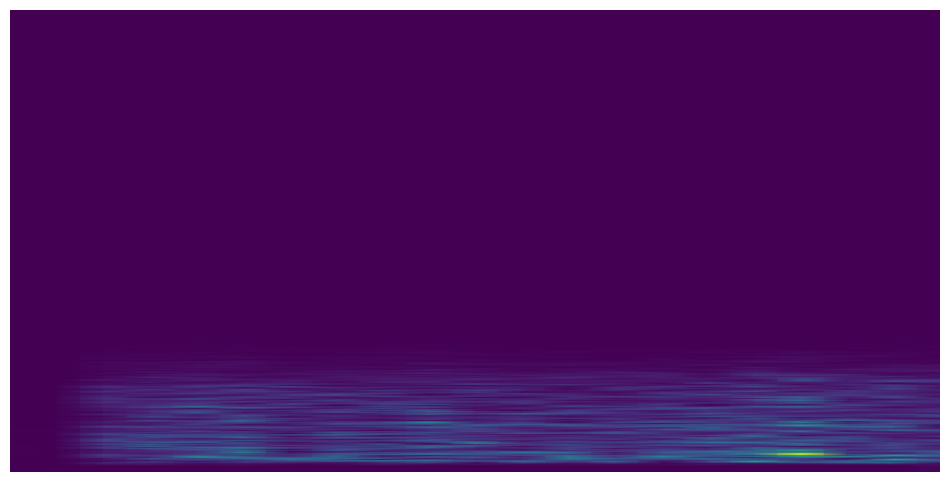

   Processed Signal
0          0.000047
1         -0.002527
2         -0.004602
3         -0.005841
4         -0.006153


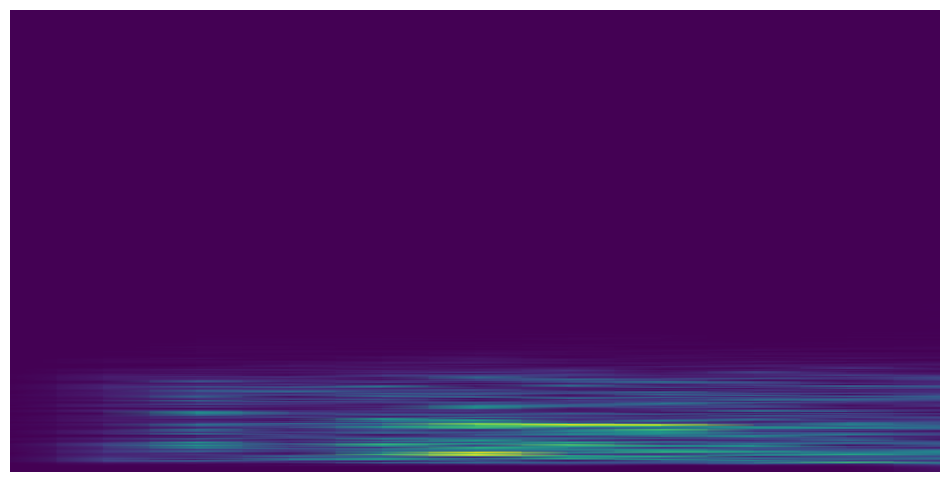

   Processed Signal
0          0.000020
1         -0.000347
2         -0.000411
3         -0.000010
4          0.000805


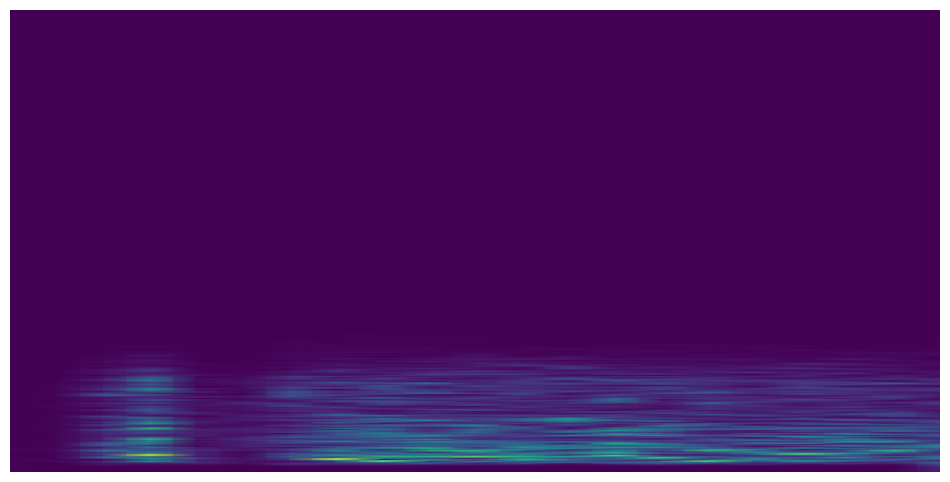

   Processed Signal
0         -0.000196
1         -0.005015
2         -0.009009
3         -0.011592
4         -0.012562


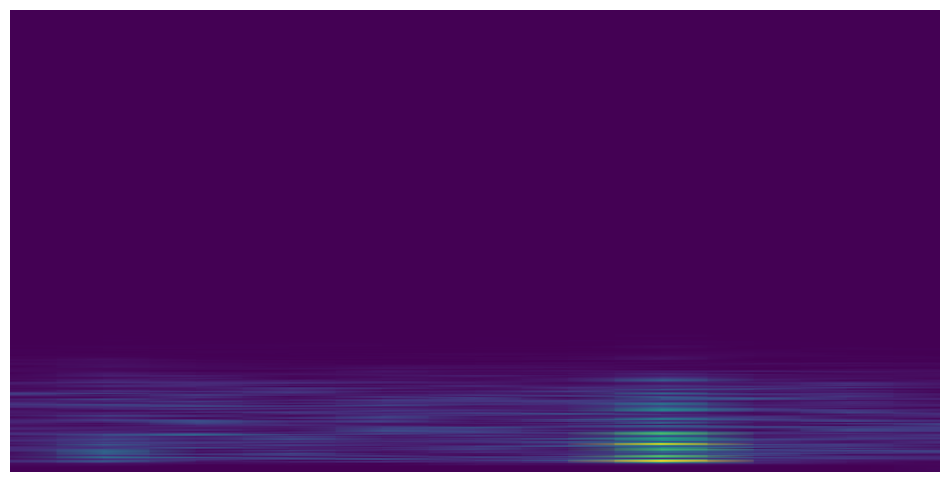

   Processed Signal
0         -0.001271
1         -0.009548
2         -0.015400
3         -0.017006
4         -0.013670


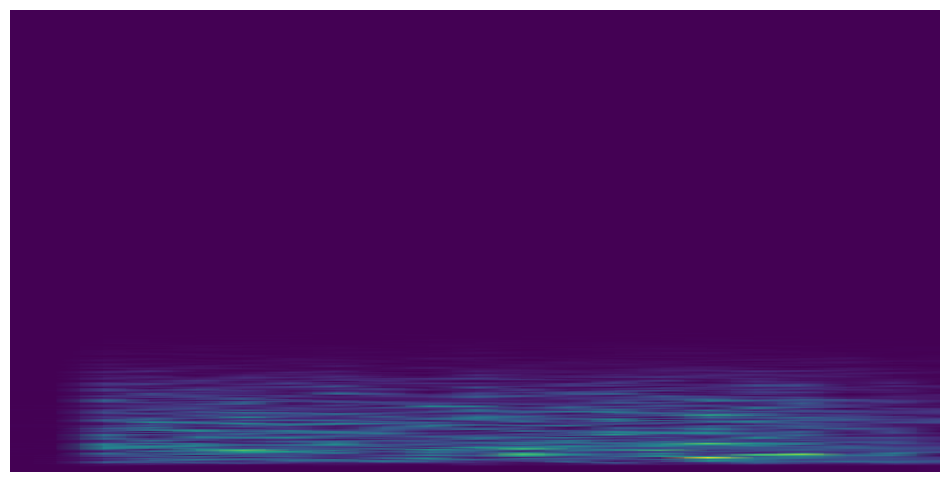

   Processed Signal
0         -0.000090
1         -0.001349
2         -0.002358
3         -0.002932
4         -0.003000


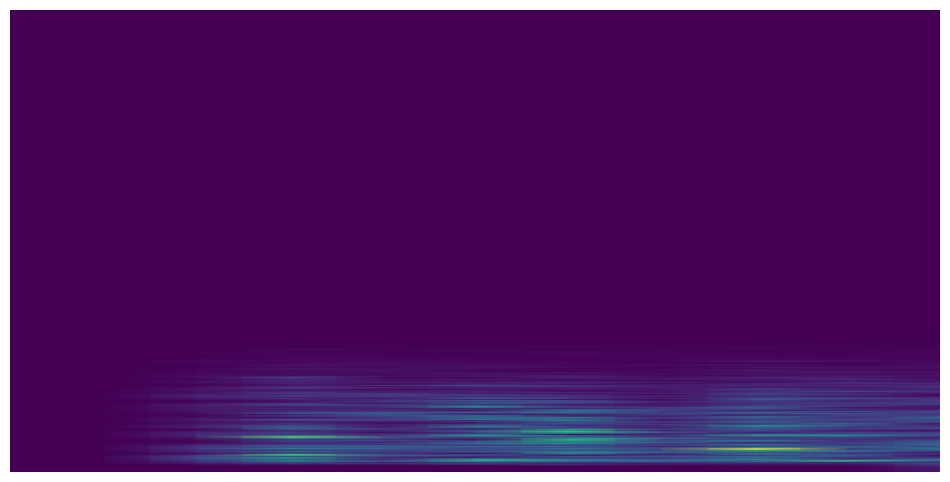

   Processed Signal
0         -0.000159
1          0.000305
2          0.000709
3          0.001018
4          0.001230


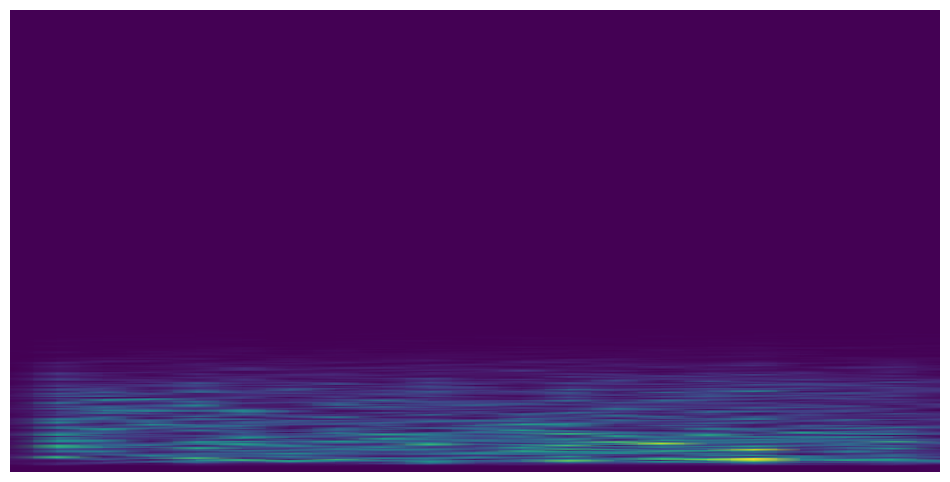

   Processed Signal
0          0.000479
1          0.005700
2          0.010091
3          0.012939
4          0.013779


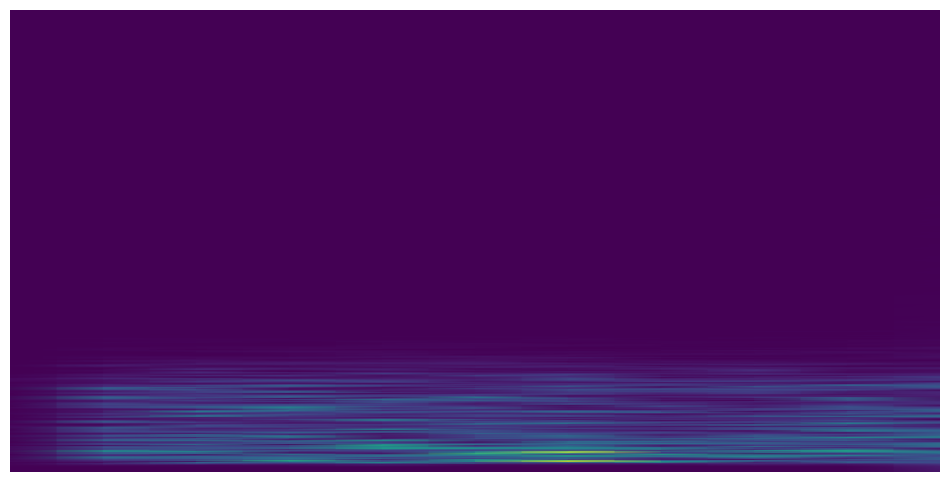

   Processed Signal
0         -0.000123
1         -0.002479
2         -0.004898
3         -0.007301
4         -0.009416


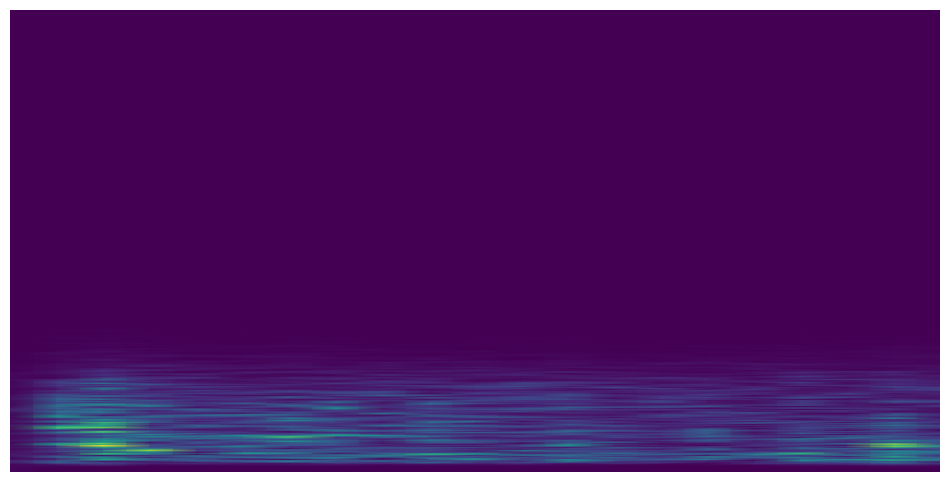

   Processed Signal
0          0.000359
1          0.009013
2          0.016217
3          0.020962
4          0.022891


   Processed Signal
0          0.006302
1         -0.024027
2         -0.052176
3         -0.076304
4         -0.094932


   Processed Signal
0         -0.000727
1         -0.011945
2         -0.020491
3         -0.024580
4         -0.023850


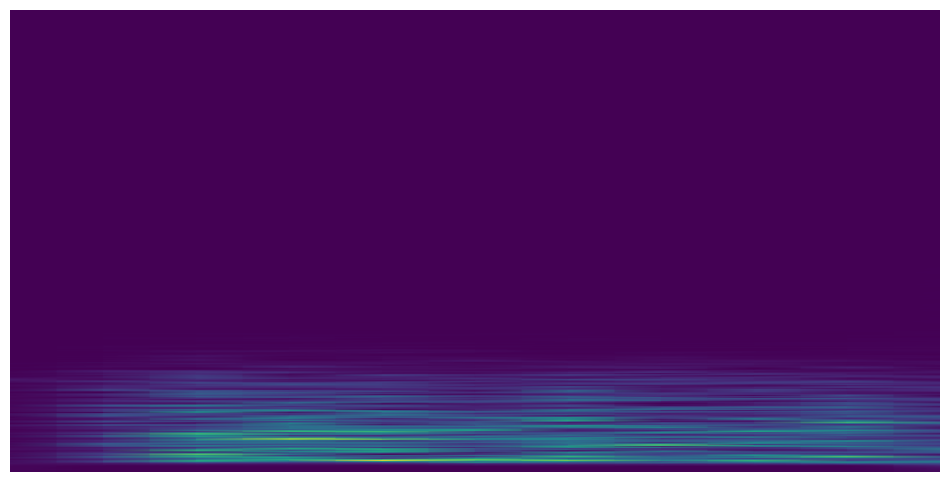

   Processed Signal
0          0.001241
1          0.009426
2          0.017031
3          0.023372
4          0.027700


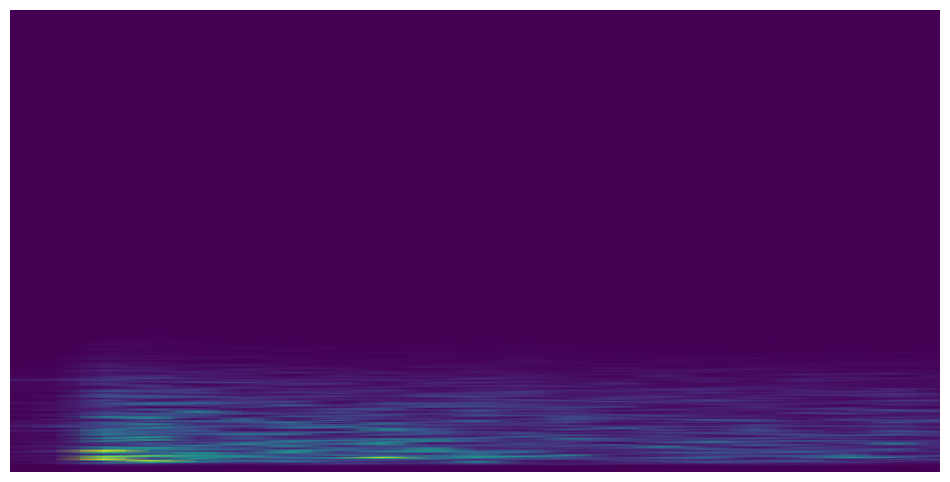

   Processed Signal
0         -0.000979
1         -0.002741
2         -0.004592
3         -0.006343
4         -0.007443


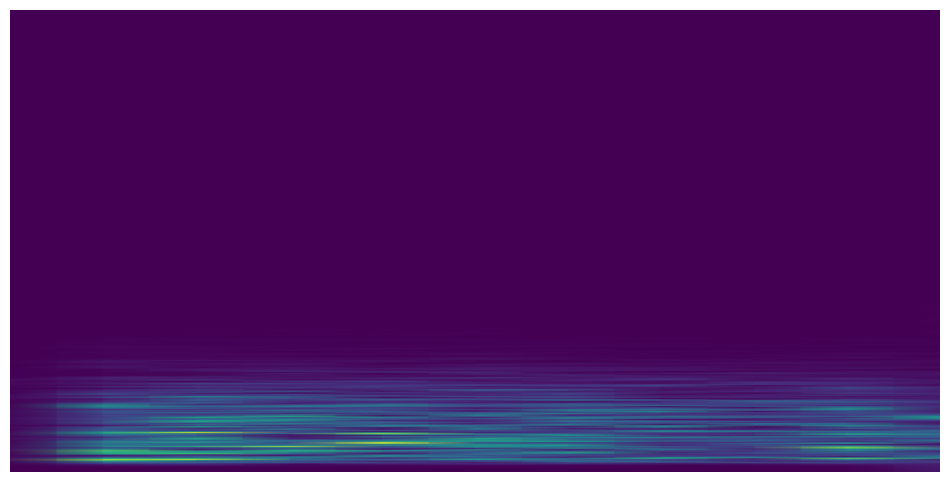

   Processed Signal
0         -0.000434
1         -0.002368
2         -0.003439
3         -0.003169
4         -0.001683


In [ ]:
# Path ke folder yang berisi file CSV fatigue
folder_path_fatigue = '/content/gdrive/MyDrive/ASB/ASB_clean/fatigue/'
output_folder = '/content/spectrograms_fatigue'  # Folder untuk menyimpan spectrogram

# Buat folder output jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Dictionary untuk menyimpan DataFrame hasil pemrosesan
processed_dataframes_fatigue = {}

# Loop melalui setiap nama file fatigue
for file_name_fatigue in file_names_fatigue:

    # Menghapus bagian nama yang mengandung "csv"
    file_name_fatigue_fix = file_name_fatigue.replace(".h5", "")
    file_name_fatigue_clear = file_name_fatigue_fix.replace(".csv", "")
    file_name_fatigue_cleaned = file_name_fatigue_clear.replace("f", "F")

    # Path ke file CSV fatigue
    file_path_fatigue = os.path.join(folder_path_fatigue, file_name_fatigue)

    # Mendefinisikan rentang yang akan disimpan (dalam indeks)
    ranges_to_keep_fatigue = [(15000, 25000), (30000, 35000)]

    # Memuat dan memfilter data fatigue
    data_segmented_fatigue = load_and_filter_data(file_path_fatigue, ranges_to_keep_fatigue)

    # Membagi data menjadi dua segmen
    data_segment_15_25 = data_segmented_fatigue[0:10000]  # 15-25 detik
    data_segment_30_35 = data_segmented_fatigue[10000:]   # 30-35 detik

    for i, data_segment in enumerate([data_segment_15_25, data_segment_30_35], start=1):
        # Menormalisasi data
        data_normalized = normalisasi(data_segment)

        # Menerapkan filter Butterworth bandpass
        data_filtered = butterworth_filter(data_normalized, lowcut, highcut, fs)

         # Nama file output untuk spectrogram
        output_filename = os.path.join(output_folder, f'{file_name_fatigue_cleaned}_segment_{i}.png')

        # Menyimpan spectrogram sebagai gambar
        save_stft(data_filtered, fs, output_filename)

        # Buat DataFrame untuk sinyal yang telah diproses
        df_processed_signal = pd.DataFrame({'Processed Signal': data_filtered})

        # Menyimpan DataFrame dalam dictionary dengan kunci gabungan nama file dan segmen
        key = f'{file_name_fatigue_cleaned}_Segment_{i}'
        processed_dataframes_fatigue[key] = df_processed_signal
        print(df_processed_signal.head())


In [ ]:
for key in processed_dataframes_fatigue.keys():
    print(key)

nazhir_F_Segment_1
nazhir_F_Segment_2
aida_F_Segment_1
aida_F_Segment_2
aldhito_F_Segment_1
aldhito_F_Segment_2
azka_F_Segment_1
azka_F_Segment_2
caca_F_Segment_1
caca_F_Segment_2
Christi_F_Segment_1
Christi_F_Segment_2
Faris_F_Segment_1
Faris_F_Segment_2
giselle_F_Segment_1
giselle_F_Segment_2
Hasna_F_Segment_1
Hasna_F_Segment_2
insan_F_Segment_1
insan_F_Segment_2
iqbal_F_Segment_1
iqbal_F_Segment_2
Khayla_F_Segment_1
Khayla_F_Segment_2
nae_F_Segment_1
nae_F_Segment_2
Nazla_F_Segment_1
Nazla_F_Segment_2
Niken_F_Segment_1
Niken_F_Segment_2
niko_F_Segment_1
niko_F_Segment_2
putri_F_Segment_1
putri_F_Segment_2
raFFa_F_Segment_1
raFFa_F_Segment_2
Rona_F_Segment_1
Rona_F_Segment_2
Shalsa_F_Segment_1
Shalsa_F_Segment_2
tyo_F_Segment_1
tyo_F_Segment_2
umar_F_Segment_1
umar_F_Segment_2
ipul_F_Segment_1
ipul_F_Segment_2
jeki_F_Segment_1
jeki_F_Segment_2
sipa_F_Segment_1
sipa_F_Segment_2
tarisa_F_Segment_1
tarisa_F_Segment_2


# Preprocessing Image

In [ ]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [ ]:
import os
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt

# Path ke folder untuk data fatigue dan non-fatigue
fatigue = '/content/spectrograms_fatigue'
non_fatigue = '/content/spectrograms_nonfatigue'
labels = ['fatigue', 'non_fatigue']

# Buat folder untuk data jika belum ada
data_folder = '/content/data_spectrograms'
os.makedirs(os.path.join(data_folder, 'fatigue'), exist_ok=True)
os.makedirs(os.path.join(data_folder, 'non_fatigue'), exist_ok=True)

# Load daftar nama file gambar dari folder fatigue dan non-fatigue
fatigue_files = os.listdir(fatigue)
non_fatigue_files = os.listdir(non_fatigue)

print('Jumlah data spectrogram fatigue:', len(os.listdir(fatigue)))
print('Jumlah data spectrogram non fatigue:', len(os.listdir(non_fatigue)))



Jumlah data spectrogram fatigue: 52
Jumlah data spectrogram non fatigue: 52


In [ ]:
# Fungsi untuk memindahkan file ke folder yang sesuai
def move_files(file_list, source_folder, destination_folder, class_name):
    for file_name in file_list:
        src = os.path.join(source_folder, file_name)
        dst = os.path.join(destination_folder, class_name, file_name)
        shutil.copyfile(src, dst)

# Fungsi untuk augmentasi dan menyimpan gambar
def augment_and_save(image_path, save_dir, datagen, prefix, num_augmented):
    img = tf.keras.utils.load_img(image_path)
    x = tf.keras.utils.img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1, save_to_dir=save_dir, save_prefix=prefix, save_format='jpeg'):
        i += 1
        if i >= num_augmented:
            break

In [ ]:
# Pindahkan file-file ke folder yang sesuai
move_files(fatigue_files, fatigue, data_folder, 'fatigue')
move_files(non_fatigue_files, non_fatigue, data_folder, 'non_fatigue')

# Load daftar nama file gambar dari folder fatigue dan non-fatigue
fatigue_files = os.listdir(fatigue)
non_fatigue_files = os.listdir(non_fatigue)

print('Jumlah data spectrogram fatigue:', len(fatigue_files))
print('Jumlah data spectrogram non fatigue:', len(non_fatigue_files))

# Pindahkan file-file ke folder yang sesuai
move_files(fatigue_files, fatigue, data_folder, 'fatigue')
move_files(non_fatigue_files, non_fatigue, data_folder, 'non_fatigue')

Jumlah data spectrogram fatigue: 52
Jumlah data spectrogram non fatigue: 52


In [ ]:
# Define paths
fatigue_path = '/content/spectrograms_fatigue'
non_fatigue_path = '/content/spectrograms_nonfatigue'

# Define destination directories
train_dir = '/content/drive/MyDrive/Siscer/TRAIN/'
test_dir = '/content/drive/MyDrive/Siscer/TEST/'

# Ensure destination directories exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Classes with labels
classes = {'fatigue': (fatigue_path, 1), 'nonfatigue': (non_fatigue_path, 0)}

# Define the augmentation configuration
datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    channel_shift_range=50.0
)

# Number of augmented images to generate per original image
num_augmented_train = 5
num_augmented_test = 1  # Slight augmentation for test set to keep original distribution

# Split data and copy to appropriate directories with augmentation for both training and test data
for class_name, (class_path, label) in classes.items():
    # Ensure destination subdirectories exist
    os.makedirs(f'{train_dir}{class_name.upper()}', exist_ok=True)
    os.makedirs(f'{test_dir}{class_name.upper()}', exist_ok=True)

    # List all files in the class directory
    files = os.listdir(class_path)
    IMG_NUM = len(files)

    for n, file_name in enumerate(files):
        img_path = os.path.join(class_path, file_name)

        if os.path.isfile(img_path):
            if n < (0.2 * IMG_NUM):
                # Augment and save augmented images to the test directory
                augment_and_save(img_path, f'{test_dir}{class_name.upper()}', datagen, f'{label}_{file_name}', num_augmented_test)
                shutil.copy(img_path, f'{test_dir}{class_name.upper()}/{label}_{file_name}')
            else:
                # Augment and save augmented images to the training directory
                augment_and_save(img_path, f'{train_dir}{class_name.upper()}', datagen, f'{label}_{file_name}', num_augmented_train)
                shutil.copy(img_path, f'{train_dir}{class_name.upper()}/{label}_{file_name}')


In [ ]:
# Function to count files in a directory
def count_files_in_directory(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        count += len(files)
    return count

# Print the count of images in each class for train and test sets
for class_name, (class_path, label) in classes.items():
    train_count = count_files_in_directory(f'{train_dir}{class_name.upper()}')
    test_count = count_files_in_directory(f'{test_dir}{class_name.upper()}')
    print(f"{class_name.upper()} - Train: {train_count}, Test: {test_count}")

print("Data split and count complete.")

FATIGUE - Train: 246, Test: 22
NONFATIGUE - Train: 246, Test: 22
Data split and count complete.


In [ ]:
# Preprocessing for training and test sets
height = 224
width = 224
batch_size = 32

def image_gen(height, width, batch_size):
    train_datagen = ImageDataGenerator(
        rescale=1./255.,
        rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.8, 1.2],
        channel_shift_range=50.0,
        validation_split=0.2  # Use 20% of data for validation
    )

    train_ds = train_datagen.flow_from_directory(
        train_dir,
        subset='training',
        batch_size=batch_size,
        color_mode="rgb",
        class_mode='binary',
        shuffle=True,
        target_size=(height, width),
    )

    val_ds = train_datagen.flow_from_directory(
        train_dir,
        subset='validation',
        batch_size=batch_size,
        color_mode="rgb",
        class_mode="binary",
        shuffle=True,
        target_size=(height, width),
    )

    test_datagen = ImageDataGenerator(rescale=1./255.)

    test_ds = test_datagen.flow_from_directory(
        test_dir,
        batch_size=batch_size,
        shuffle=False,
        color_mode="rgb",
        class_mode="binary",
        target_size=(height, width),
    )

    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = image_gen(height, width, batch_size)

# Print the count of images in each class
total_images = np.concatenate([train_ds.labels, test_ds.labels])
print({"Non-fatigue cases": len(np.where(total_images == 0)[0]),
       "Fatigue cases": len(np.where(total_images == 1)[0])})

Found 394 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Found 44 images belonging to 2 classes.
{'Non-fatigue cases': 219, 'Fatigue cases': 219}


In [ ]:
from sklearn.utils import class_weight

# Calculate class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(train_ds.classes),
                                                  y=train_ds.classes)
class_weights = dict(enumerate(class_weights))

class_weights

{0: 1.0, 1: 1.0}

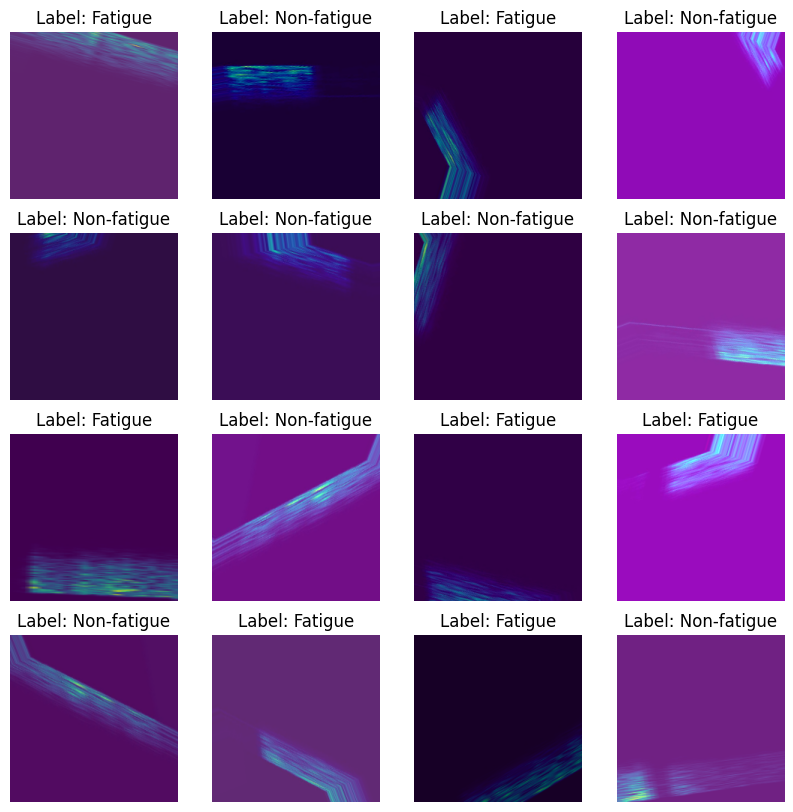

In [ ]:
# Display a sample of augmented images from the training dataset
fig, ax = plt.subplots(4, 4, figsize=(10, 10))
for k in range(16):
    images, labels = train_ds.next()
    i, j = k // 4, k % 4
    ax[i, j].imshow(images[0])
    label = 'Fatigue' if labels[0] == 1 else 'Non-fatigue'
    ax[i, j].set_title(f"Label: {label}")
    ax[i, j].axis('off')
plt.show()

In [ ]:
# Display the number of samples in the training and test sets
train_samples = train_ds.samples
val_samples = val_ds.samples
test_samples = test_ds.samples

print(f"Number of samples in the training set: {train_samples}")
print(f"Number of samples in the validation set: {val_samples}")
print(f"Number of samples in the test set: {test_samples}")


Number of samples in the training set: 394
Number of samples in the validation set: 98
Number of samples in the test set: 44


# Model

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Define the simplified CNN model
model = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=(height, width, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 224, 224, 32)      128       
 chNormalization)                                                
                                                                 
 activation_3 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 112, 112, 64)     

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.000001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
13/13 [==============================] - 65s 5s/step - loss: 0.8777 - accuracy: 0.5000 - val_loss: 0.7005 - val_accuracy: 0.4796
Epoch 2/10
13/13 [==============================] - 59s 4s/step - loss: 0.8309 - accuracy: 0.5254 - val_loss: 0.6973 - val_accuracy: 0.4898
Epoch 3/10
13/13 [==============================] - 79s 6s/step - loss: 0.8955 - accuracy: 0.4898 - val_loss: 0.6973 - val_accuracy: 0.5000
Epoch 4/10
13/13 [==============================] - 64s 5s/step - loss: 0.8832 - accuracy: 0.4772 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 5/10
13/13 [==============================] - 61s 4s/step - loss: 0.8435 - accuracy: 0.5076 - val_loss: 0.7018 - val_accuracy: 0.4898
Epoch 6/10
13/13 [==============================] - 70s 5s/step - loss: 0.7791 - accuracy: 0.5330 - val_loss: 0.7003 - val_accuracy: 0.4898
Epoch 7/10
13/13 [==============================] - 65s 5s/step - loss: 0.8017 - accuracy: 0.5584 - val_loss: 0.7009 - val_accuracy: 0.5000
Epoch 8/10
13/13 [==

In [ ]:
# Get the test accuracy
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc}")

2/2 [==============================] - 4s 842ms/step - loss: 0.6975 - accuracy: 0.5000
Test Accuracy: 0.5


In [ ]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 13.5 MB/s eta 0:00:00


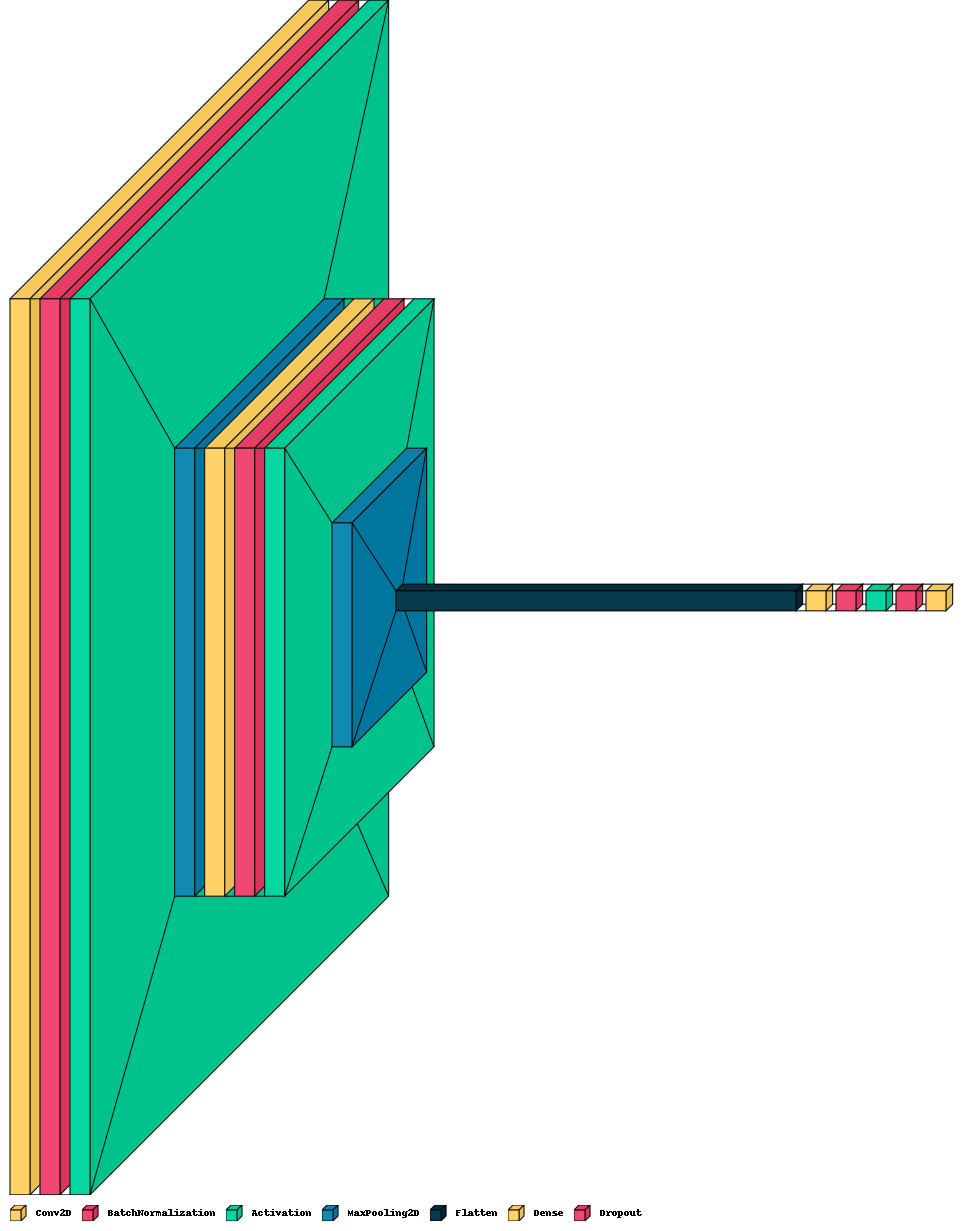

In [ ]:
import visualkeras

visualkeras.layered_view(model,to_file='output_model1.png',legend = True)

## Evaluation

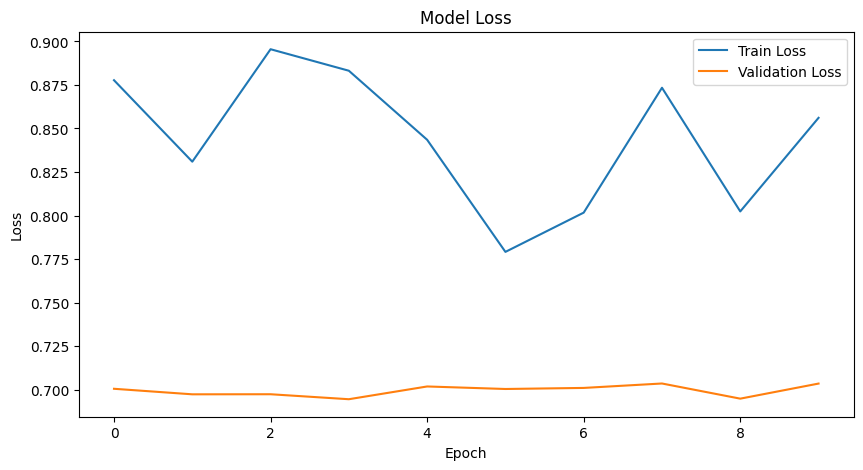

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


2/2 [==============================] - 9s 3s/step


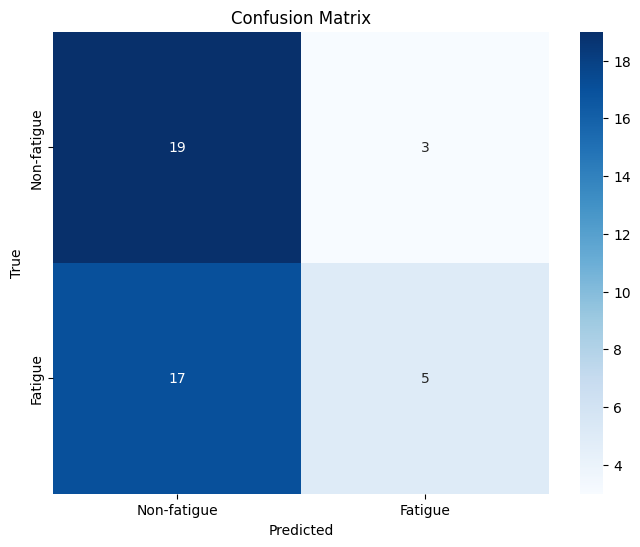

              precision    recall  f1-score   support

 Non-fatigue       0.53      0.86      0.66        22
     Fatigue       0.62      0.23      0.33        22

    accuracy                           0.55        44
   macro avg       0.58      0.55      0.49        44
weighted avg       0.58      0.55      0.49        44



In [ ]:
# Get the true labels and predictions
test_labels = test_ds.classes
predictions = model.predict(test_ds)
predictions = (predictions > 0.5).astype(int).reshape(-1)

# Generate the confusion matrix
cm = confusion_matrix(test_labels, predictions)
cm_labels = ['Non-fatigue', 'Fatigue']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(test_labels, predictions, target_names=cm_labels))


# VGG16

In [ ]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

In [ ]:
# Load ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(height, width, 3))
base_model.trainable = False  # Freeze the base model

# Define the new model on top
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 23850113 (90.98 MB)
Trainable params: 26240

In [ ]:
# Load ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(height, width, 3))
base_model.trainable = False  # Freeze the base model

# Define the new model on top
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_ds, epochs=10, validation_data=test_ds)


94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/10
13/13 [==============================] - 91s 7s/step - loss: 0.8351 - accuracy: 0.5279 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 2/10
13/13 [==============================] - 91s 7s/step - loss: 0.7564 - accuracy: 0.5482 - val_loss: 0.6991 - val_accuracy: 0.5000
Epoch 3/10
13/13 [==============================] - 90s 7s/step - loss: 0.8191 - accuracy: 0.4543 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
13/13 [==============================] - 88s 7s/step - loss: 0.7661 - accuracy: 0.4949 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
13/13 [==============================] - 86s 7s/step - loss: 0.7609 - accuracy: 0.4772 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 6/10
13/13 [==============================] - 89s 7s/step - loss: 0.7595 - accuracy: 0.4797 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 7/10
13/13 [==============================] - 87s 7s/step - loss: 0.7480 - accuracy: 0.47

In [ ]:
# Get the test accuracy
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc}")

2/2 [==============================] - 16s 4s/step - loss: 0.6929 - accuracy: 0.5455
Test Accuracy: 0.5454545617103577


## Evaluation VGG

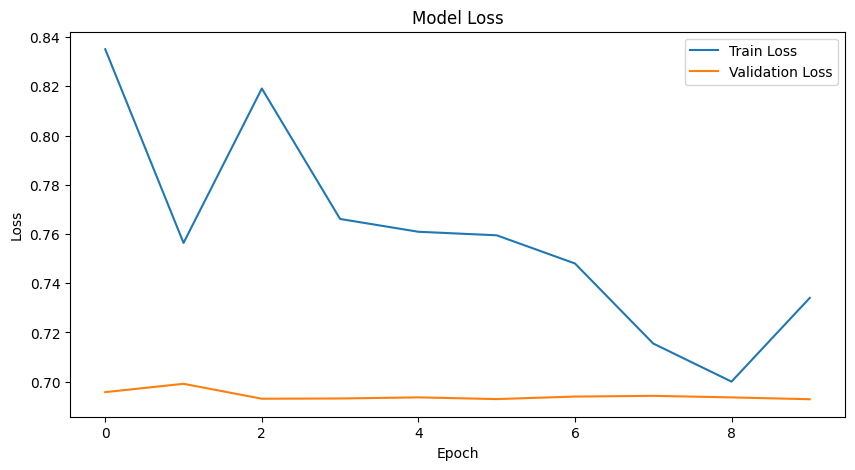

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


2/2 [==============================] - 8s 2s/step


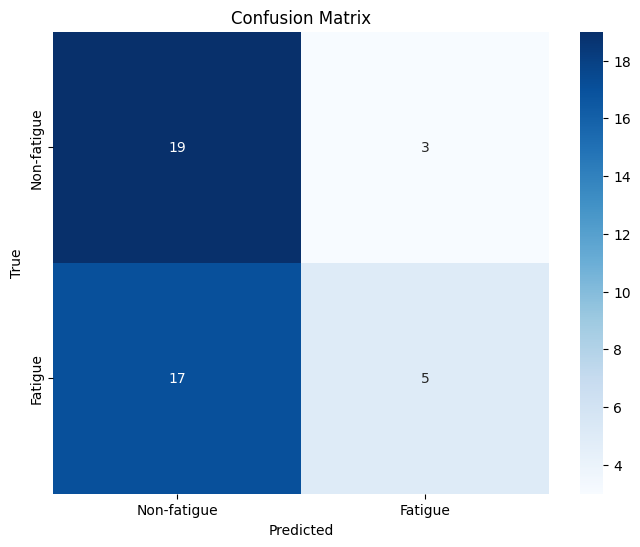

              precision    recall  f1-score   support

 Non-fatigue       0.53      0.86      0.66        22
     Fatigue       0.62      0.23      0.33        22

    accuracy                           0.55        44
   macro avg       0.58      0.55      0.49        44
weighted avg       0.58      0.55      0.49        44



In [ ]:
# Get the true labels and predictions
test_labels = test_ds.classes
predictions = model.predict(test_ds)
predictions = (predictions > 0.5).astype(int).reshape(-1)

# Generate the confusion matrix
cm = confusion_matrix(test_labels, predictions)
cm_labels = ['Non-fatigue', 'Fatigue']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(test_labels, predictions, target_names=cm_labels))


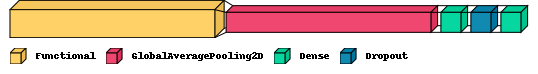

In [ ]:
import visualkeras

visualkeras.layered_view(model,to_file='output_model1.png',legend = True)